In [ ]:
# 1YK2gmCgHvL2VwRwP09qv6C-hWV_1eayq

# **Walmart Business Case Study**

Walmart is an American multinational retail corporation that operates a chain of super centers, discount departmental stores, and grocery stores in the United States. Walmart has more than 100 million customers worldwide.

**Objective of analyzing Walmart data**

The Management team at Walmart Inc. wants to analyze the customer purchase behav
ior (precisely, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

**Importing Libraries**

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from scipy.stats import norm

**Downloading Dataset**

In [ ]:
!gdown 1YK2gmCgHvL2VwRwP09qv6C-hWV_1eayq

Downloading...
From: https://drive.google.com/uc?id=1YK2gmCgHvL2VwRwP09qv6C-hWV_1eayq
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 123MB/s] 


**Reading csv file**

In [ ]:
walmart_data = pd.read_csv('walmart_data.csv')

**Data analysis like checking the structure & characteristics of the dataset**

In [ ]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Displaying data types of each column**

In [ ]:
walmart_data.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


**Finding the number of rows and columns given in the dataset**

In [ ]:
print(f"'Number of Rows' :{walmart_data.shape[0]}\n'NumberofColumns' :{walmart_data.shape[1]}")

'Number of Rows' :550068
'NumberofColumns' :10


**Check for the missing values and find the number of missing values in each column**

In [ ]:
walmart_data.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


**Replacing the values in marital_status column**

In [ ]:
walmart_data['Marital_Status'] = walmart_data['Marital_Status'].replace({0:'Unmarried',1:'Married'})
walmart_data['Marital_Status'].unique()

array(['Unmarried', 'Married'], dtype=object)

In [ ]:
# conversion of categorical attributes to 'category'
column=["User_ID","Occupation","Marital_Status","Product_Category"]
walmart_data[column]=walmart_data[column].astype("object")

**Viewing and understanding few 5 rows of the Netfix dataframe**

In [ ]:
walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


**Checking the unique values for columns**

In [ ]:
for i in walmart_data.columns:
 print(f'Unique Values in {i} column are :-\n {walmart_data[i].unique()}\n')
 print('-'*80)

Unique Values in User_ID column are :-
 [1000001 1000002 1000003 ... 1004113 1005391 1001529]

--------------------------------------------------------------------------------
Unique Values in Product_ID column are :-
 ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

--------------------------------------------------------------------------------
Unique Values in Gender column are :-
 ['F' 'M']

--------------------------------------------------------------------------------
Unique Values in Age column are :-
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

--------------------------------------------------------------------------------
Unique Values in Occupation column are :-
 [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]

--------------------------------------------------------------------------------
Unique Values in City_Category column are :-
 ['A' 'C' 'B']

---------------------------------------------------------------------------

**Checking the number of unique values for columns**

In [ ]:
for i in walmart_data.columns:
 print('Number of Unique Values in',i,'column :', walmart_data[i].nunique())
 print('-'*70)

Number of Unique Values in User_ID column : 5891
----------------------------------------------------------------------
Number of Unique Values in Product_ID column : 3631
----------------------------------------------------------------------
Number of Unique Values in Gender column : 2
----------------------------------------------------------------------
Number of Unique Values in Age column : 7
----------------------------------------------------------------------
Number of Unique Values in Occupation column : 21
----------------------------------------------------------------------
Number of Unique Values in City_Category column : 3
----------------------------------------------------------------------
Number of Unique Values in Stay_In_Current_City_Years column : 5
----------------------------------------------------------------------
Number of Unique Values in Marital_Status column : 2
----------------------------------------------------------------------
Number of Unique Values 

**Statistical summary of All columns**

In [ ]:
walmart_data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


The dataset provides information on the following variables:

User_ID: It contains unique identification numbers assigned to each user. The dataset includes a total of 550,068 user records.

Occupation: This variable represents the occupation of the users. The dataset includes values ranging from 0 to 20, indicating different occupations.

Product_Category: It indicates the category of the products purchased by the users. The dataset includes values ranging from 1 to 20, representing different product categories.

Purchase: This variable represents the purchase amount made by each user. The dataset includes purchase values ranging from 12 to 23,961.

**Detect Outliers**

In [ ]:
continuous_var = ['Purchase']
arr = {'5th percentile': 5, '25th percentile or Q1': 25, '50th percentile or Q2': 50, '75th percentile or Q3': 75, '95th percentile': 95}

In [ ]:
for key, value in arr.items():
 for var in continuous_var:
  print(f'{var}-> {key} : {np.percentile(walmart_data[var], value):.2f}')

Purchase-> 5th percentile : 1984.00
Purchase-> 25th percentile or Q1 : 5823.00
Purchase-> 50th percentile or Q2 : 8047.00
Purchase-> 75th percentile or Q3 : 12054.00
Purchase-> 95th percentile : 19336.00


In [ ]:
for var in continuous_var:
 # Calculate the IQR for the variable
 Q1 = np.percentile(walmart_data[var], arr['25th percentile or Q1'])
 Q3 = np.percentile(walmart_data[var], arr['75th percentile or Q3'])
 percentile_95 = np.percentile(walmart_data[var], arr['95th percentile'])
 IQR = Q3- Q1

 # Define the outlier thresholds
 lower_threshold = Q1- 1.5 * IQR
 upper_threshold = Q3 + 1.5 * IQR

 # Find the outliers for the variable
 outliers = walmart_data[(walmart_data[var] < lower_threshold) |(walmart_data[var] > upper_threshold)]

 # Calculate the percentage of outliers
 outlier_percentage = round(len(outliers) / len(walmart_data[var]) * 100, 2 )

 # Output the percentage of outliers
 print(f"IQR for {var}: {IQR}")
 print(f"Outlier above this Q3 {var} : {upper_threshold}")
 print(f"Percentage of outliers for {var}: {outlier_percentage}% \n")

IQR for Purchase: 6231.0
Outlier above this Q3 Purchase : 21400.5
Percentage of outliers for Purchase: 0.49% 



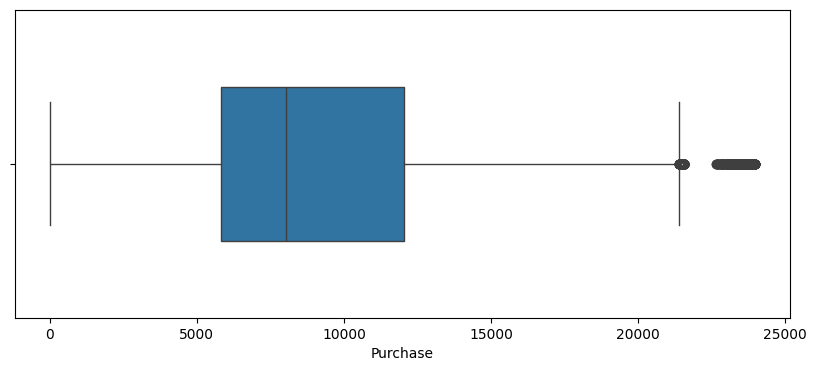

In [ ]:
plt.figure(figsize=(10, 4))

# Box Plot for Purchase
sns.boxplot(x=walmart_data['Purchase'], patch_artist=True, widths=0.5)
plt.show()

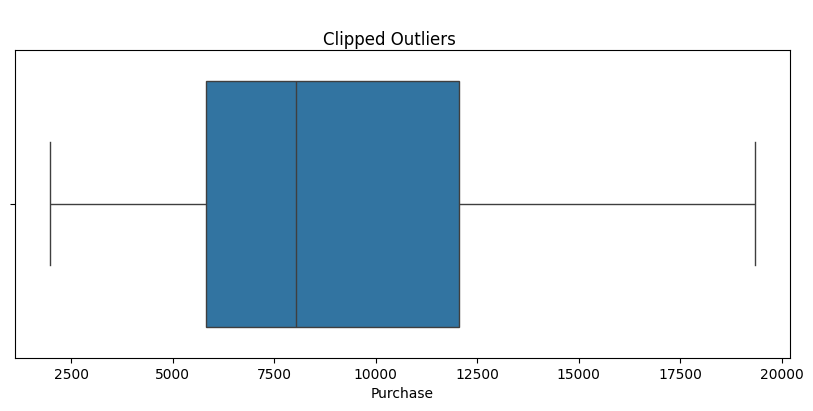

In [ ]:
clipped_purchase = np.clip(walmart_data['Purchase'], np.percentile(walmart_data['Purchase'], 5), np.percentile(walmart_data['Purchase'], 95))
plt.figure(figsize=(10, 4))
plt.suptitle("\nClipped Outliers\n\n")
sns.boxplot(data=walmart_data,x=clipped_purchase)
plt.show()

**Insights:**

Based on this graphical representation, it is evident that both Purchase has only a minor presence of outliers which is 0.49%.

**Non-Graphical Analysis:**

**Description of columns with 'object' datatype**

In [ ]:
walmart_data.describe(include = 'object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


 The provided data represents summary statistics for two variables: Product_ID and Gender. Here is a breakdown of the information:

 Product_ID: There are 3,631 unique values observed in this variable, indicating that
 there are 3,631 different products. The top value, which appears most frequently, is
 'P00265242'. This value occurs 1,880 times in the dataset.

 Gender: There are 2 unique values in this variable, which suggests that it represents
 a binary category. The top value is 'M' (i.e., Male), indicating that 'M' is the most
 common gender category. It appears 414,259 times in the dataset.

 These summary statistics provide insights into the distribution and frequency of the
 Product_ID and Gender variables. They give an understanding of the number of unique
 products, the most common product, and the dominant gender category in the dataset.

**value_counts and unique attributes**

In [ ]:
categorical_columns = ['User_ID', 'Gender', 'Age', 'Occupation','City_Category', 'Marital_Status', 'Product_Category','Stay_In_Current_City_Years']

In [ ]:
# How many unique customers' data is given in the dataset?
print(f"Total number of unique customers in dataset are {walmart_data['User_ID'].nunique()}")

Total number of unique customers in dataset are 5891


In [ ]:
# Total number of transactions made by each gender
np.round(walmart_data['Gender'].value_counts(normalize = True) * 100, 2)

,proportion
Gender,
M,75.31
F,24.69


We have the data of 5891 customers who made at least one purchase on Black Friday in Walmart.

It is clear from the above that out of every four transactions, three are made by males as Males made more than 75% of purchase.

In [ ]:
np.round(walmart_data['Product_Category'].value_counts(normalize=True) *100, 2).cumsum()

,proportion
Product_Category,
5,27.44
1,52.96
8,73.67
11,78.09
2,82.43
6,86.15
3,89.82
4,91.96
16,93.75


 It can be inferred from the above result that 82.43% of the total transactions are made for only 5 Product Categories. These are 5, 1, 8, 11 and 2.

In [ ]:
np.round(walmart_data['Stay_In_Current_City_Years'].value_counts(normalize =True) * 100, 2).sort_values(ascending=False)

,proportion
Stay_In_Current_City_Years,
1,35.24
2,18.51
3,17.32
4+,15.40
0,13.53


From the above result, it is clear that majority of the transactions (53.75 % of total
 transactions) are made by the customers having **1 or 2** years of stay in the current city.

In [ ]:
np.round(walmart_data['Occupation'].value_counts(normalize = True) * 100, 2).cumsum()

,proportion
Occupation,
4,13.15
0,25.81
7,36.56
1,45.18
17,52.46
20,58.56
12,64.23
14,69.19
2,74.02


 It can be inferred from the above that 82.33 % of the total transactions are made by
 the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6
 (Ordered in descending order of the total transactions share.)

**How many unique customers are there for each gender**

In [ ]:
gender_dist = pd.DataFrame(walmart_data.groupby('Gender')['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
gender_dist['percent_share'] = np.round(gender_dist['unique_customers'] /gender_dist['unique_customers'].sum() * 100, 2)
gender_dist

,Gender,unique_customers,percent_share
0,F,1666,28.28
1,M,4225,71.72


There are more unique male customers than female who purchased the products.

**How many transactions are made by each gender category ?**

In [ ]:
transaction_dist = pd.DataFrame(walmart_data.groupby('Gender')['User_ID'].count()).reset_index()
transaction_dist

,Gender,User_ID
0,F,135809
1,M,414259


In [ ]:
print('Average number of transactions made by each Male on Black Friday is',round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday is',round(135809 / 1666))

Average number of transactions made by each Male on Black Friday is 98
Average number of transactions made by each Female on Black Friday is 82


**What is the total Revenue generated by Walmart from each Gender ?**

In [ ]:
total_revenue = pd.DataFrame(walmart_data.groupby('Gender')['Purchase'].sum()).reset_index()
total_revenue['Total Revenue Percentage'] = np.round(total_revenue['Purchase'] / total_revenue['Purchase'].sum() *100,2)
total_revenue

,Gender,Purchase,Total Revenue Percentage
0,F,1186232642,23.28
1,M,3909580100,76.72


What is the average total purchase made by each user in each gender ?

In [ ]:
total_purchase = walmart_data.groupby(by=['Gender','User_ID'])['Purchase'].sum().reset_index().rename(columns={'Purchase':'Average_Purchase'})
total_purchase.groupby(by = 'Gender')['Average_Purchase'].mean()

,Average_Purchase
Gender,
F,712024.394958
M,925344.402367


**What is the Average Revenue generated by Walmart from each Gender per transaction ?**

In [ ]:
average_revenue = np.round(walmart_data.groupby(by=['Gender'])['Purchase'].mean().reset_index().rename(columns = {'Purchase' : 'Average_Purchase'}),2)
average_revenue

,Gender,Average_Purchase
0,F,8734.57
1,M,9437.53


**How many unique customers are there for each Marital Status ?**

In [ ]:
unique_customers = walmart_data.groupby('Marital_Status')['User_ID'].nunique()
unique_customers

,User_ID
Marital_Status,
Married,2474
Unmarried,3417


**How many transactions are made by each Marital Status category ?**

In [ ]:
transactions_made = walmart_data.groupby('Marital_Status')['User_ID'].count()
transactions_made

,User_ID
Marital_Status,
Married,225337
Unmarried,324731


**What is the total Revenue generated by Walmart from each Marital Status ?**

In [ ]:
total_revenue = walmart_data.groupby('Marital_Status')['Purchase'].sum()
total_revenue

,Purchase
Marital_Status,
Married,2086885295
Unmarried,3008927447


**What is the average total purchase made by each user in each marital status ?**

In [ ]:
average_purchase = walmart_data.groupby(by=['Marital_Status','User_ID'])['Purchase'].mean()
average_purchase

Marital_Status  User_ID
Married         1000004    14747.714286
                1000005     7745.292453
                1000007    13804.000000
                1000008    10345.363636
                1000010     9728.744395
                               ...     
Unmarried       1006034    16423.833333
                1006035     6293.717105
                1006037     9176.540984
                1006038     7502.833333
                1006040     9184.994444
Name: Purchase, Length: 5891, dtype: float64

 Top average total purchase from Married users is : 1000004

 Top average total purchase from Unmarried users is : 1006034

In [ ]:
age_dist = walmart_data.groupby(by = ['Age'])['User_ID'].nunique().reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
age_dist['percent_share'] = np.round(age_dist['unique_customers'] /age_dist['unique_customers'].sum() * 100, 2)
age_dist['cumulative_percent'] = age_dist['percent_share'].cumsum()
age_dist

,Age,unique_customers,percent_share,cumulative_percent
2,26-35,2053,34.85,34.85
3,36-45,1167,19.81,54.66
1,18-25,1069,18.15,72.81
4,46-50,531,9.01,81.82
5,51-55,481,8.16,89.98
6,55+,372,6.31,96.29
0,0-17,218,3.70,99.99


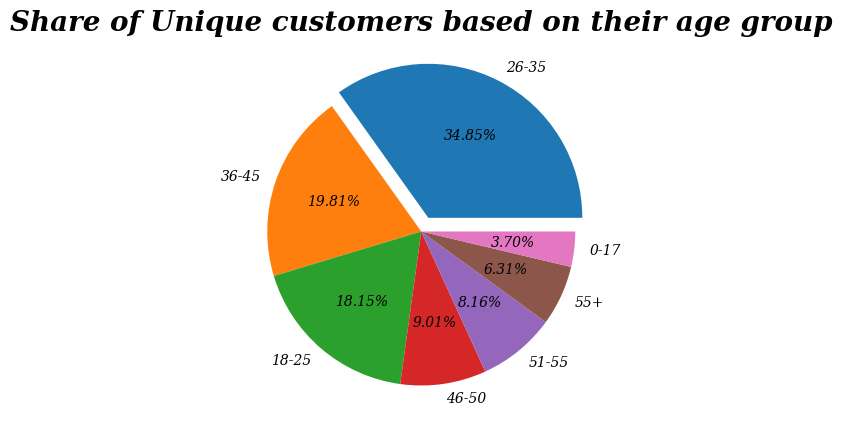

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Share of Unique customers based on their age group', fontdict ={'fontsize' : 20,
 'fontstyle' : 'oblique',
 'fontfamily' : 'serif',
 'fontweight' : 600} )
plt.pie(x = age_dist['percent_share'], labels = age_dist['Age'], explode = [0.1] + [0] * 6, autopct = '%.2f%%',
 textprops = {'fontsize' : 10,
 'fontstyle' : 'oblique',
 'fontfamily' : 'serif',
 'fontweight' : 500})
plt.show()

In [ ]:
walmart_data['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
age_revenue = pd.DataFrame(walmart_data.groupby(by = 'Age', as_index =False)['Purchase'].sum().sort_values(by = 'Purchase', ascending = False)).reset_index()
age_revenue['percent_share'] = np.round((age_revenue['Purchase'] /age_revenue['Purchase'].sum()) * 100, 2)
age_revenue['cumulative_percent_share'] = age_revenue['percent_share'].cumsum()
age_revenue

,index,Age,Purchase,percent_share,cumulative_percent_share
0,2,26-35,2031770578,39.87,39.87
1,3,36-45,1026569884,20.15,60.02
2,1,18-25,913848675,17.93,77.95
3,4,46-50,420843403,8.26,86.21
4,5,51-55,367099644,7.20,93.41
5,6,55+,200767375,3.94,97.35
6,0,0-17,134913183,2.65,100.00


Users aged 26-35 represent the largest age group,constituting approximately 40% of the dataset.

The 0-17 age group and the 55+ age group each contribute to about 3% of the dataset.

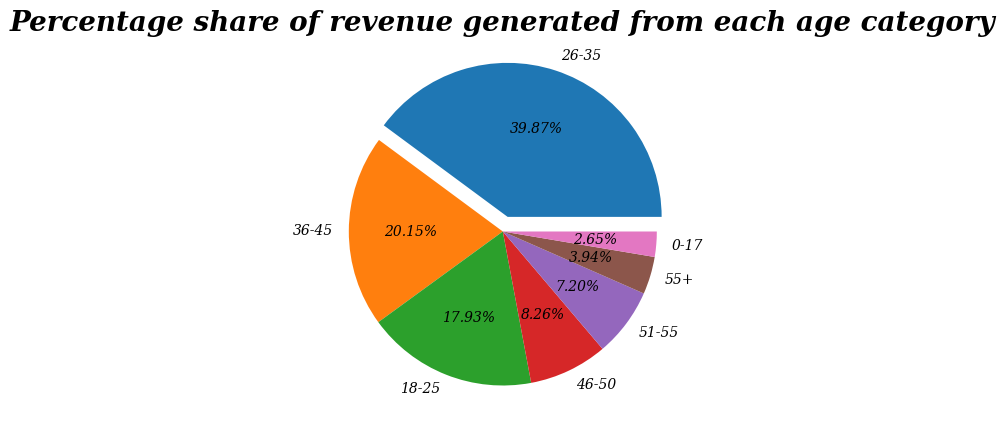

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Percentage share of revenue generated from each age category',fontdict = {'fontsize' : 20,
 'fontstyle' : 'oblique',
 'fontfamily' : 'serif',
 'fontweight' : 600} )
plt.pie(x = age_revenue['percent_share'], labels = age_revenue['Age'],
 explode = [0.1] + [0] * 6, autopct = '%.2f%%',
 textprops = {'fontsize' : 10,
 'fontstyle' : 'oblique',
 'fontfamily' : 'serif',
 'fontweight' : 500})
plt.show()

In [ ]:
city_dist = walmart_data.groupby(by = ['City_Category'])['User_ID'].nunique().reset_index().rename(columns = {'User_ID' : 'unique_customers'})
city_dist['percent_share'] = np.round((city_dist['unique_customers'] /city_dist['unique_customers'].sum()) * 100, 2)
city_dist['cumulative_percent_share'] = city_dist['percent_share'].cumsum()
city_dist

,City_Category,unique_customers,percent_share,cumulative_percent_share
0,A,1045,17.74,17.74
1,B,1707,28.98,46.72
2,C,3139,53.28,100.00


In [ ]:
walmart_data['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


**What is the revenue generated from different cities ?**

In [ ]:
cities_revenue = walmart_data.groupby('City_Category')['Purchase'].sum().reset_index().rename(columns={'Purchase' : 'Revenue from Cities'})
cities_revenue.sort_values(by ='Revenue from Cities',ascending=False)

,City_Category,Revenue from Cities
1,B,2115533605
2,C,1663807476
0,A,1316471661


In [ ]:
walmart_data.groupby(by = ['Product_Category'])['Product_ID'].nunique().sort_values(ascending=False)

,Product_ID
Product_Category,
8,1047
5,967
1,493
11,254
2,152
6,119
7,102
16,98
3,90


**What is the revenue generated from different product categories ?**

In [ ]:
products_revenue = pd.DataFrame(walmart_data.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False)).reset_index()
products_revenue

,Product_Category,Purchase
0,1,1910013754
1,5,941835229
2,8,854318799
3,6,324150302
4,2,268516186
5,3,204084713
6,16,145120612
7,11,113791115
8,10,100837301
9,15,92969042


**What is the total Revenue generated by Walmart from each Gender ?**

In [ ]:
gender_revenue = pd.DataFrame(walmart_data.groupby('Gender')['Purchase'].sum().sort_values(ascending=False)).reset_index()
gender_revenue['Percentage_share'] = np.round( gender_revenue['Purchase']/ gender_revenue['Purchase'].sum()* 100, 2)
gender_revenue

,Gender,Purchase,Percentage_share
0,M,3909580100,76.72
1,F,1186232642,23.28


**Univariate Analysis**

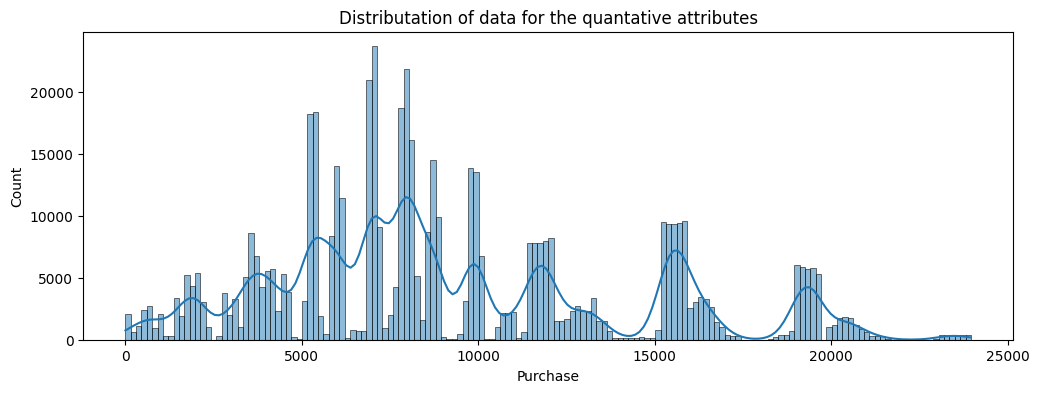

In [ ]:
#Distributation of data for the quantative attributes
plt.figure(figsize=(12,4))
plt.title("Distributation of data for the quantative attributes")
sns.histplot(data=walmart_data,x="Purchase",kde=True)
plt.show()

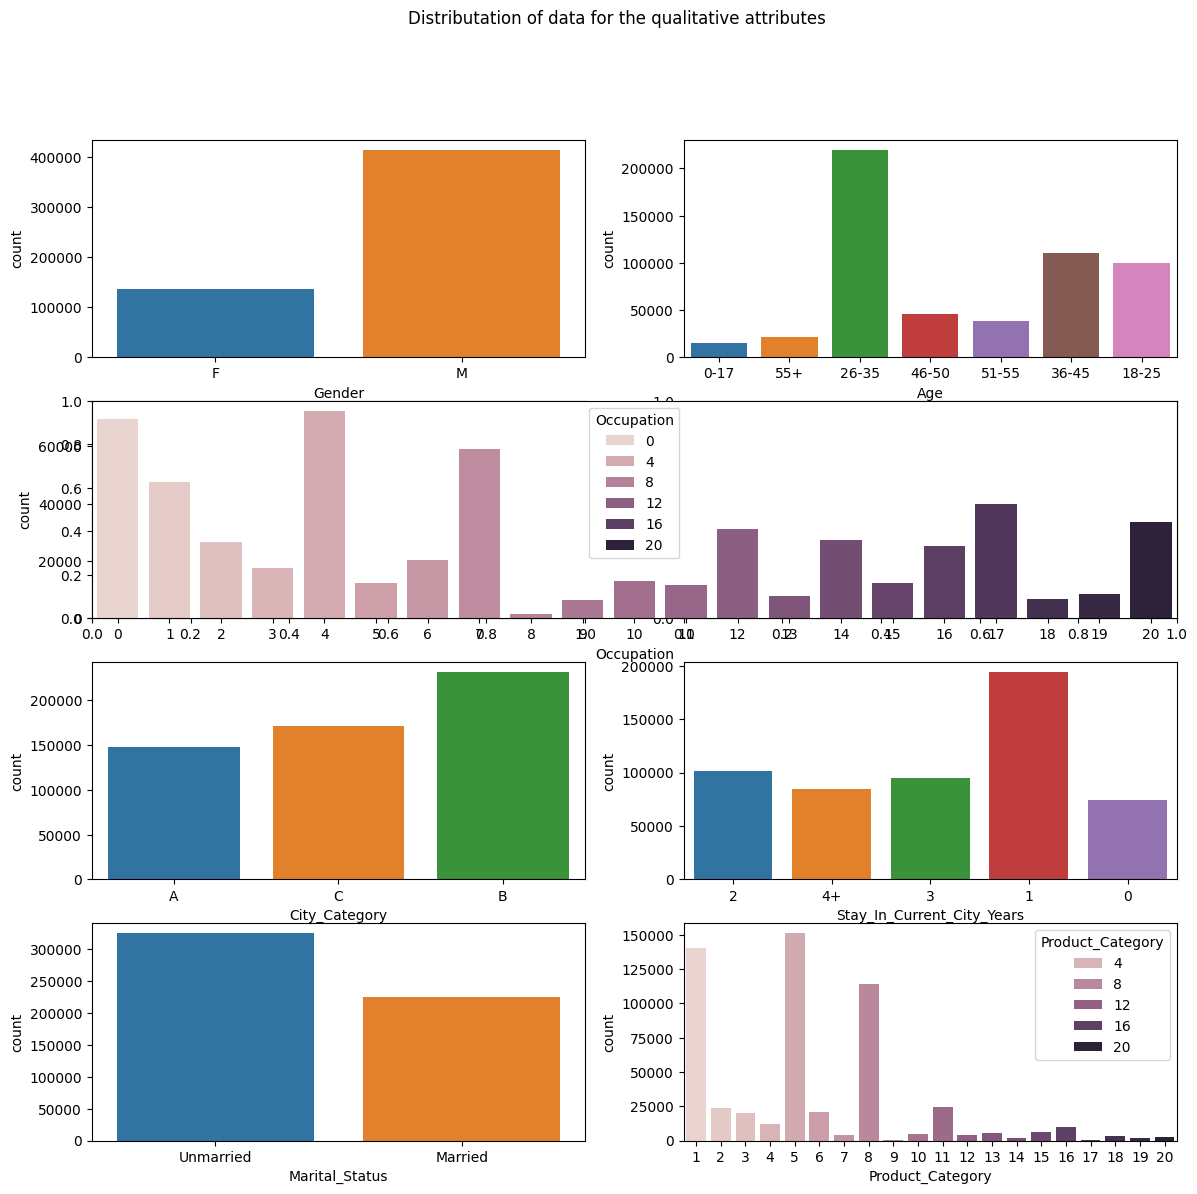

In [ ]:
#Distributation of data for the qualitative attribute
fig,ax=plt.subplots(4,2,figsize=(14,13))
fig.suptitle("Distributation of data for the qualitative attributes")

plt.subplot(4,2,1)
sns.countplot(data=walmart_data,x="Gender", hue='Gender')

plt.subplot(4,2,2)
sns.countplot(data=walmart_data,x="Age", hue="Age")

plt.subplot(4,2,(3,4))
sns.countplot(data=walmart_data,x="Occupation", hue="Occupation")

plt.subplot(4,2,5)
sns.countplot(data=walmart_data,x="City_Category", hue="City_Category")

plt.subplot(4,2,6)
sns.countplot(data=walmart_data,x="Stay_In_Current_City_Years",hue="Stay_In_Current_City_Years")

plt.subplot(4,2,7)
sns.countplot(data=walmart_data,x="Marital_Status", hue="Marital_Status")

plt.subplot(4,2,8)
sns.countplot(data=walmart_data,x="Product_Category", hue="Product_Category")

plt.show()

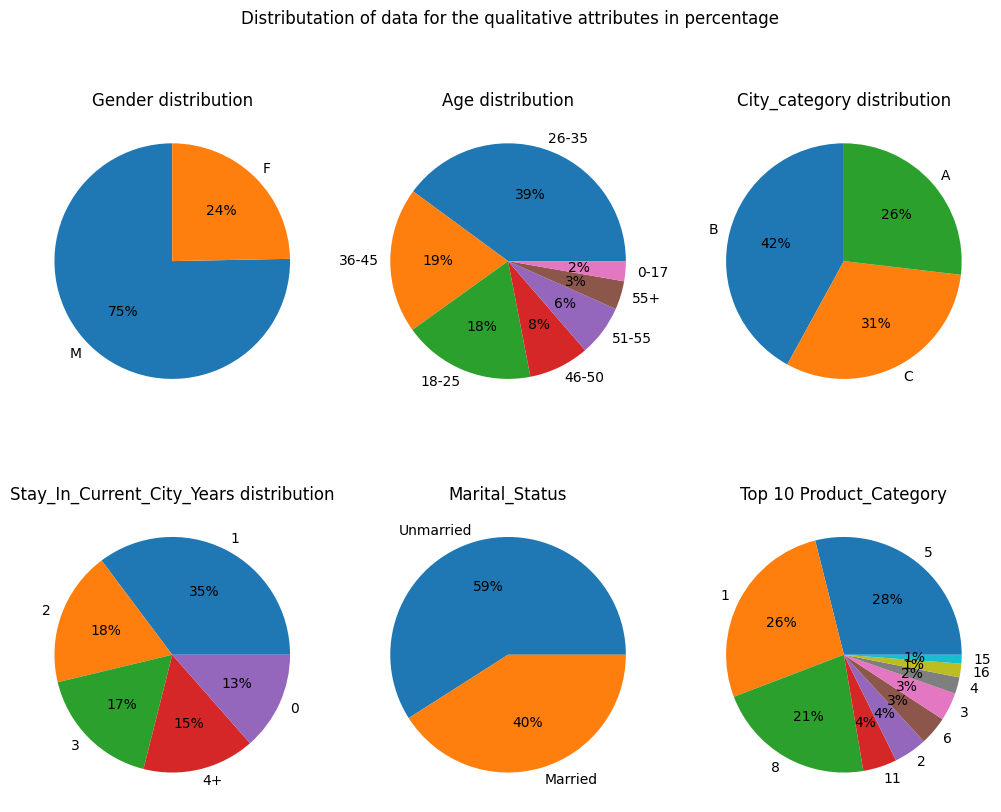

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(10,9))
fig.suptitle("Distributation of data for the qualitative attributes in percentage")

plt.subplot(2,3,1)
data_Gender=walmart_data['Gender'].value_counts(normalize=True)*100
plt.pie(data_Gender, labels=data_Gender.index, autopct='%d%%', startangle=90)
plt.title("Gender distribution")

plt.subplot(2,3,2)
data_Age=walmart_data['Age'].value_counts(normalize=True)*100
plt.pie(data_Age, labels=data_Age.index,autopct='%d%%', startangle=0)
plt.title("Age distribution")

plt.subplot(2,3,3)
data_City_Category=walmart_data['City_Category'].value_counts(normalize=True)*100
plt.pie(data_City_Category, labels=data_City_Category.index, autopct='%d%%', startangle=90)
plt.title("City_category distribution")

plt.subplot(2,3,4)
data_Stay_In_Current_City_Years=walmart_data['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
plt.pie(data_Stay_In_Current_City_Years, labels=data_Stay_In_Current_City_Years.index, autopct='%d%%', startangle=0)
plt.title("Stay_In_Current_City_Years distribution")

plt.subplot(2,3,5)
data_Marital_Status=walmart_data["Marital_Status"].value_counts(normalize=True)*100
plt.pie(data_Marital_Status, labels=data_Marital_Status.index, autopct='%d%%', startangle=0)
plt.title("Marital_Status")

plt.subplot(2,3,6)
data_Product_Category=(walmart_data["Product_Category"].value_counts(normalize=True)*100).sort_values(ascending=False).head(10)
plt.pie(data_Product_Category, labels=data_Product_Category.index, autopct='%d%%', startangle=0)
plt.title("Top 10 Product_Category")
plt.tight_layout()

plt.show()

**Insights:**
 1. Gender Distribution:
 The data suggests a significant majority of male users, indicating a potential gender based
 trend in shopping behavior.
 2. Age Group Preferences:
 Users aged between 26 and 35 are the most prominent age group in the dataset,
 with a focus on users aged 18 to 45.
 3. Occupation Trends:
 Occupations labeled as 0, 4, and 7 appear frequently among the 20 occupation types.
 4. City Residence:
 City category labeled as 'B' has the highest number of users, while categories 'A' and 'C'
 show a more evenly distributed user population.
 5. Length of Residence:
A majority of users have resided in their current city for more than one year, indicating
 stability in their place of residence.
 6. Marital Status:
 Unmarried users outnumber married users in the dataset.
 7. Product Category Preferences:
 Users predominantly purchase products from categories 5, 1, and 8.

**Bivariate Analysis**

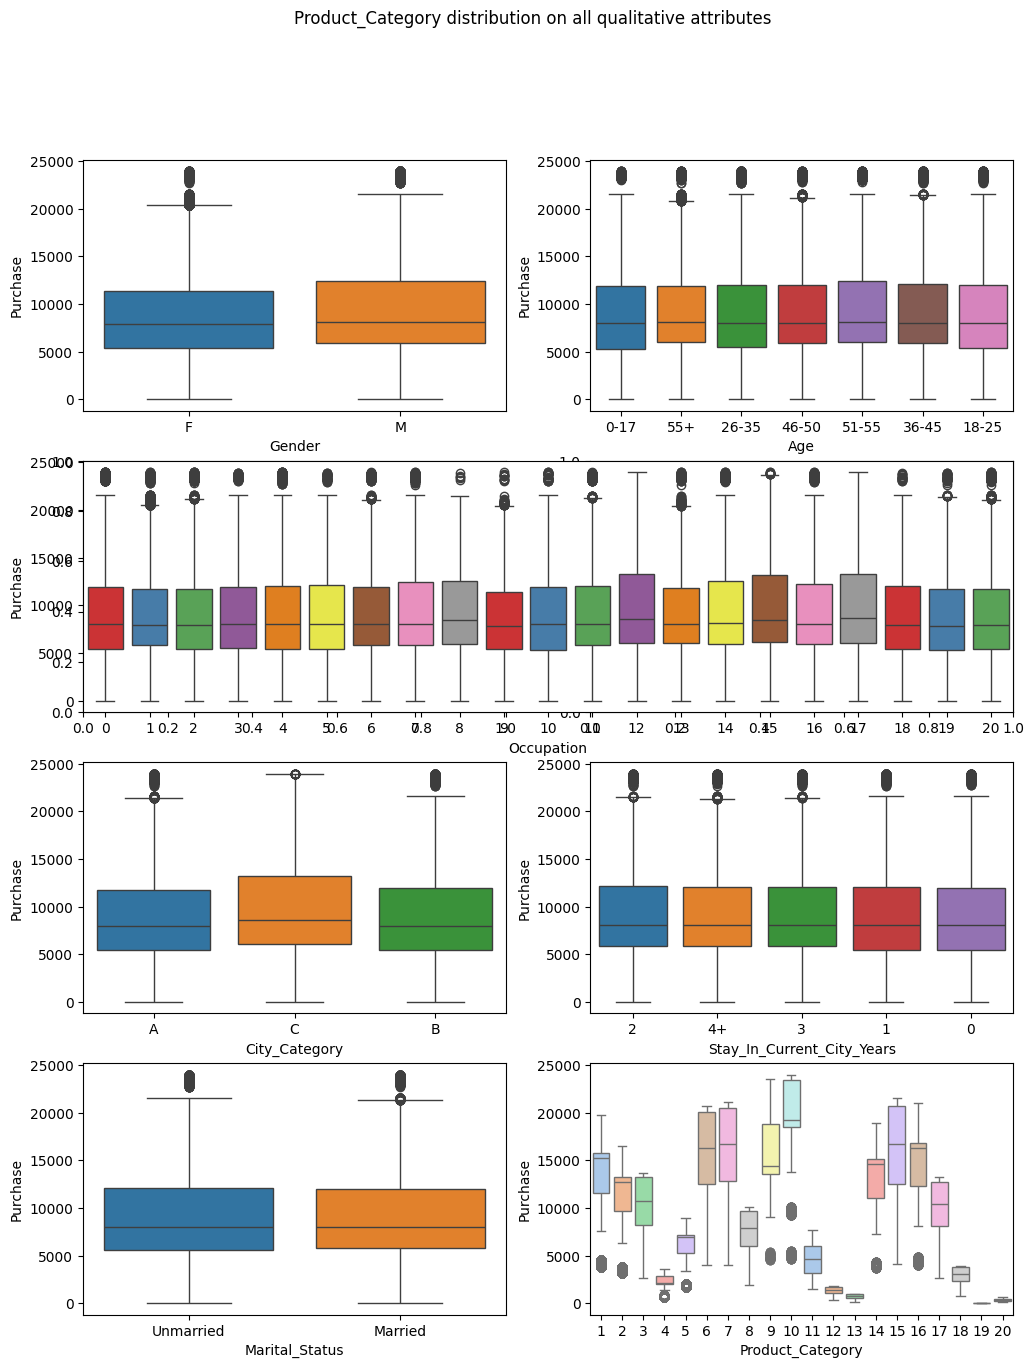

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(12,15))
fig.suptitle("Product_Category distribution on all qualitative attributes")

plt.subplot(4,2,1)
sns.boxplot(data=walmart_data,x="Gender",y="Purchase", hue="Gender", legend=False)

plt.subplot(4,2,2)
sns.boxplot(data=walmart_data,x="Age",y="Purchase", hue="Age", legend=False)

plt.subplot(4,2,(3,4))
sns.boxplot(data=walmart_data,x="Occupation",y="Purchase", hue="Occupation", legend=False, palette='Set1')

plt.subplot(4,2,5)
sns.boxplot(data=walmart_data,x="City_Category",y="Purchase", hue="City_Category", legend=False)

plt.subplot(4,2,6)
sns.boxplot(data=walmart_data,x="Stay_In_Current_City_Years",y="Purchase", hue="Stay_In_Current_City_Years", legend=False)

plt.subplot(4,2,7)
sns.boxplot(data=walmart_data,x="Marital_Status",y="Purchase", hue="Marital_Status", legend=False)

plt.subplot(4,2,8)
sns.boxplot(data=walmart_data,x="Product_Category",y="Purchase", hue="Product_Category", legend=False, palette='pastel')

plt.show()

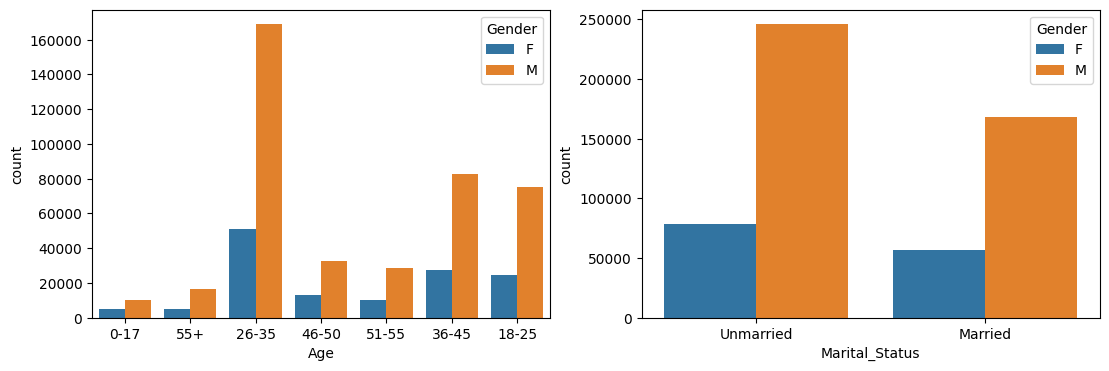

In [ ]:
plt.subplots(1,2,figsize=(13,4))
fig.suptitle("Gender distribution on age and marital_status")

plt.subplot(1,2,1)
sns.countplot(data=walmart_data,x="Age",hue="Gender")

plt.subplot(1,2,2)
sns.countplot(data=walmart_data,x="Marital_Status",hue="Gender")

plt.show()

In [ ]:
walmart_revised_Data =walmart_data.drop(["User_ID","Product_ID"],axis=1)

In [ ]:
walmart_revised_Data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,F,0-17,10,A,2,Unmarried,3,8370
1,F,0-17,10,A,2,Unmarried,1,15200
2,F,0-17,10,A,2,Unmarried,12,1422
3,F,0-17,10,A,2,Unmarried,12,1057
4,M,55+,16,C,4+,Unmarried,8,7969


In [ ]:
sample1=walmart_revised_Data.sample(n=300)
sample1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
129279,M,36-45,2,A,4+,Married,5,6914
367797,M,46-50,7,C,1,Unmarried,8,9797
528556,M,18-25,4,A,1,Unmarried,8,3992
122159,M,46-50,20,A,1,Unmarried,5,5454
405516,M,26-35,1,A,3,Unmarried,8,9767
...,...,...,...,...,...,...,...,...
67340,M,26-35,18,A,0,Married,5,5273
235796,M,26-35,17,B,1,Unmarried,1,11459
14240,F,18-25,20,A,3,Married,5,2005
182775,M,36-45,7,C,4+,Unmarried,5,8729


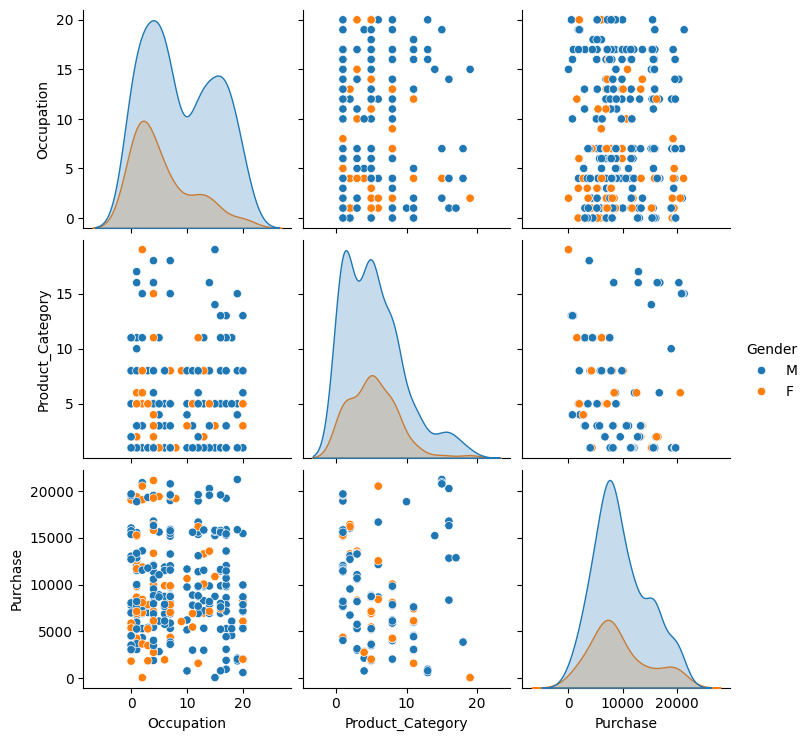

In [ ]:
sns.pairplot(data=sample1,hue="Gender")
plt.show()

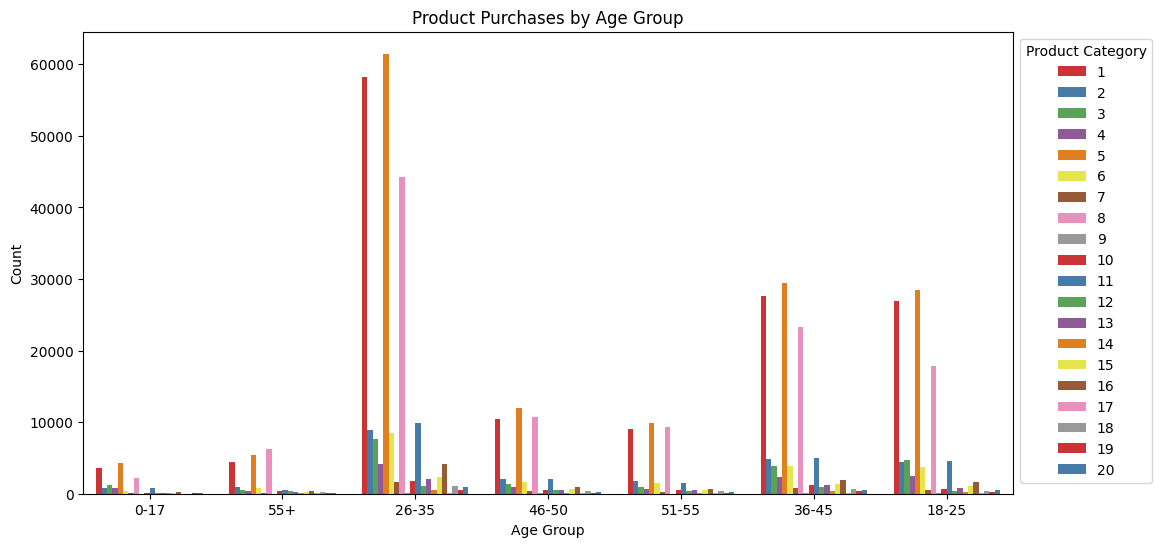

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=walmart_data, x="Age", hue="Product_Category", palette='Set1')
plt.title("Product Purchases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Product Category", bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

**Multivariate Analysis**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


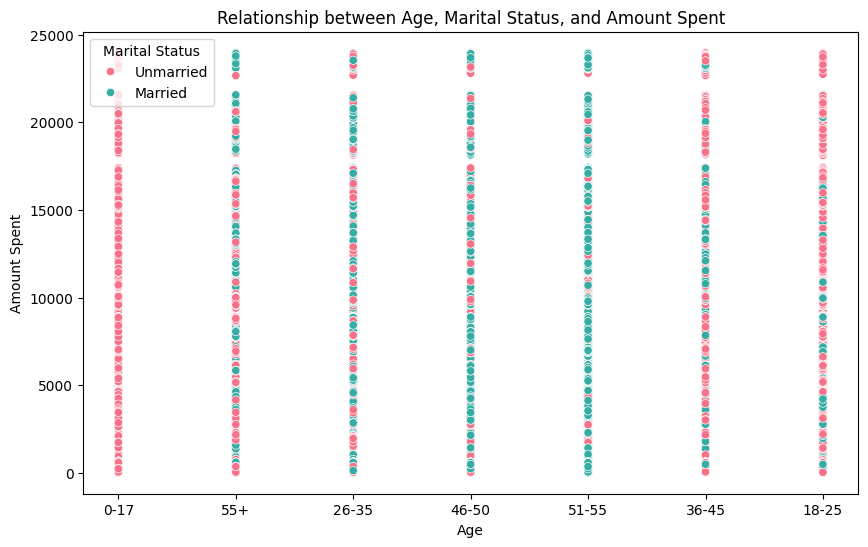

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=walmart_data, x="Age", y="Purchase", hue="Marital_Status", palette='husl')
plt.title("Relationship between Age, Marital Status, and Amount Spent")
plt.xlabel("Age")
plt.ylabel("Amount Spent")
plt.legend(title="Marital Status")

plt.show()

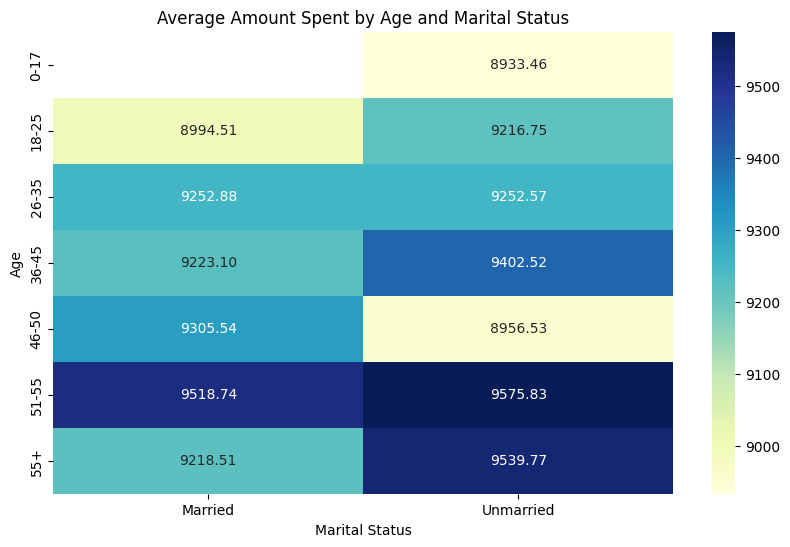

In [ ]:
 # Heatmap
plt.figure(figsize=(10, 6))
pivot_table = walmart_data.pivot_table(index="Age", columns="Marital_Status", values="Purchase", aggfunc="mean")
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Amount Spent by Age and Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Age")

plt.show()

**Scatter Plot Insights:**

There doesn't seem to be a clear, discernible pattern or trend in the relationship between age,
 marital status, and the amount spent based on the scatter plot. The distribution of data points
 across different ages and marital status categories appears to be relatively scattered, indicating
 that there may not be a strong linear relationship between these variables.

 **Heatmap Insights:**

 The heatmap provides a clearer visualization of the average amount spent across different age
 groups and marital status categories. There doesn’t appear to be a strong correlation between age,
 marital status, and the average amount spent, as indicated by the lack of significant variation in
 the average spending amounts across different age and marital status categories.

 Overall, based on these visualizations, it seems that there may not be a strong relationship between
 age, marital status, and the amount spent. However, these insights are based on the provided
 visualizations, and further analysis, such as statistical testing or additional data exploration, may
 be necessary to confirm these findings.

**Answering questions:**
 1. Are women spending more money per transaction than men? Why or Why not?
 2. Confidence intervals and distribution of the mean of the expenses by female and male customers.
 3. Are confidence intervals of average male and female spending overlapping? How can Walmart
 leverage this conclusion to make changes or improvements?
 4. Results when the same activity is performed for Married vs Unmarried.
 5. Results when the same activity is performed for Age.

In [ ]:
walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


**Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
#creating a walmart_data for purchase amount vs gender
money_spend = walmart_data.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
money_spend['sum_in_billions'] = round(money_spend['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
money_spend['%sum'] = round(money_spend['sum']/money_spend['sum'].sum(),2)

#calculationg per purchase amount
#renaming the gender
money_spend['per_purchase'] = round(money_spend['sum']/money_spend['count'],2)
money_spend['Gender'] = money_spend['Gender'].replace({'F':'Female','M':'Male'})
money_spend

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.23,8734.57
1,Male,3909580100,414259,3.91,0.77,9437.53


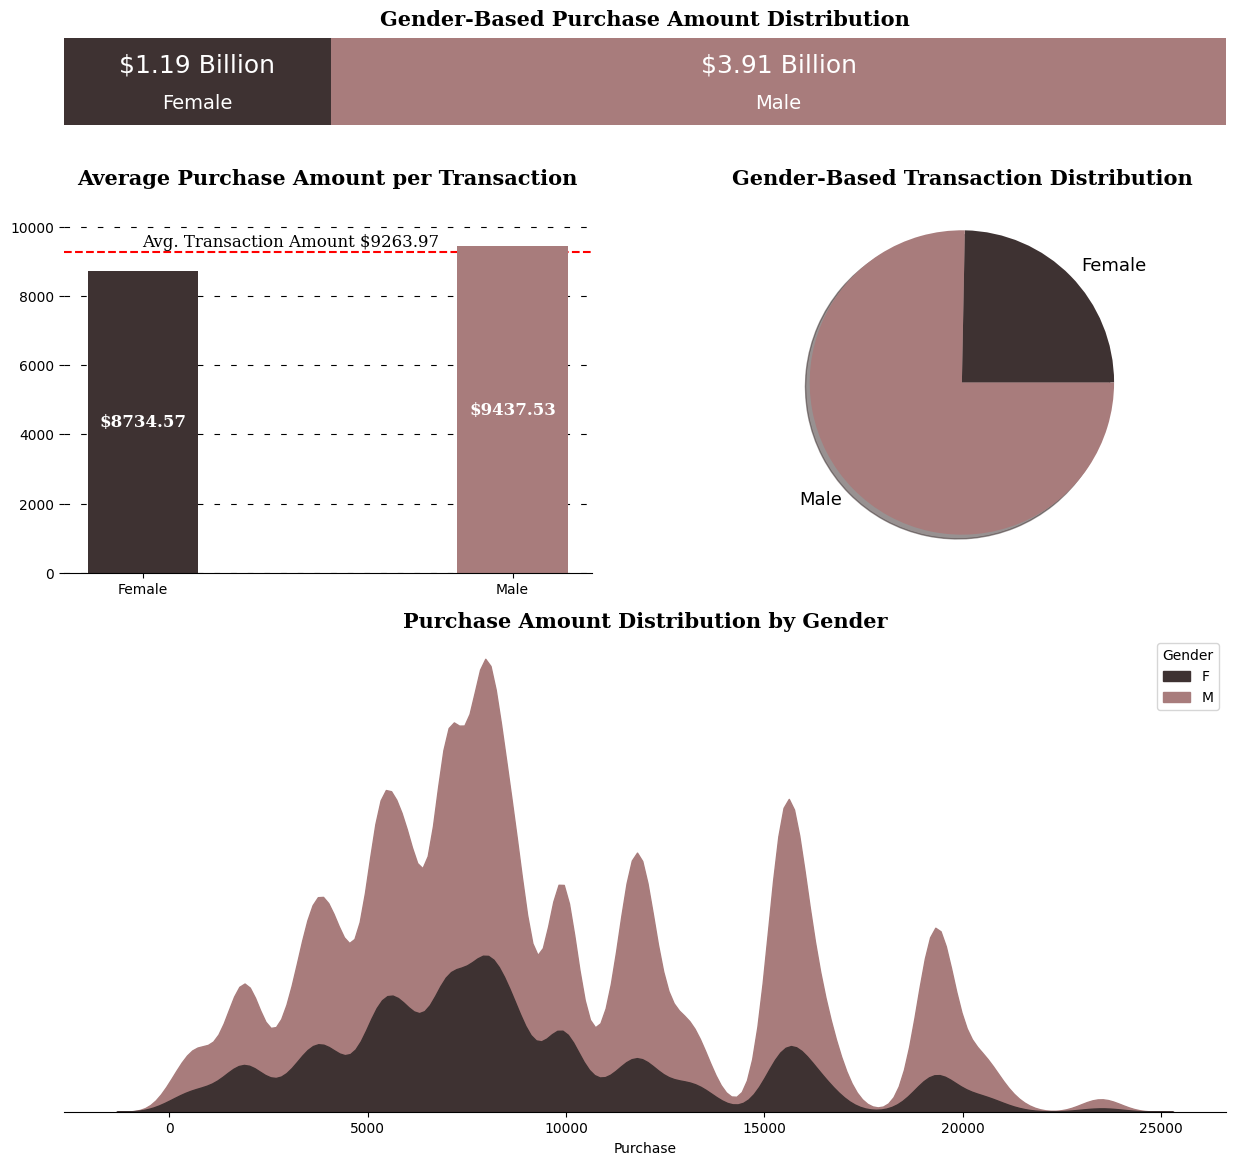

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])
color_map = ["#3E3232", "#A87C7C"]

#Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(money_spend.loc[0,'Gender'],width = money_spend.loc[0,'%sum'],color = color_map[0],label = 'Female')
ax.barh(money_spend.loc[0,'Gender'],width = money_spend.loc[1,'%sum'],left =money_spend.loc[0,'%sum'], color = color_map[1],label = 'Male' )

#inserting the text
txt = [0.0] #for left parameter in ax.text()
for i in money_spend.index:
  #for amount
  ax.text(money_spend.loc[i,'%sum']/2 + txt[0],0.15,f"${money_spend.loc[i,'sum_in_billions']} Billion", va = 'center', ha='center',fontsize=18, color='white')

  #for gender
  ax.text(money_spend.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{money_spend.loc[i,'Gender']}", va = 'center', ha='center',fontsize=14, color='white')

  txt += money_spend.loc[i,'%sum']

#removing the axis lines
for axislines in ['top','left','right','bottom']:
 ax.spines[axislines].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Gender-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})

#Distribution of Purchase Amount per Transaction
ax1 = fig.add_subplot(gs[1,0])

#plotting the visual
ax1.bar(money_spend['Gender'],money_spend['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(walmart_data['Purchase'].mean(),2)
ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg +300, f"Avg. Transaction Amount ${avg:}", {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the y limits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in money_spend.index:
  ax1.text(money_spend.loc[i,'Gender'],money_spend.loc[i,'per_purchase']/2,f"${money_spend.loc[i,'per_purchase']}",
 {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size': 15,'weight':'bold'})

# creating pie chart for gender disribution
ax2 = fig.add_subplot(gs[1,1])
ax2.pie(money_spend['count'],labels = money_spend['Gender'], shadow = True,colors = color_map, textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Gender-Based Transaction Distribution',{'font':'serif', 'size': 15,'weight':'bold'})

# creating kdeplot for purchase amount distribution
ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = walmart_data, x = 'Purchase', hue = 'Gender', palette = color_map,fill = True, alpha = 1,ax = ax3)

#removing the axis lines
for axislines in ['top','left','right']:
  ax1.spines[axislines].set_visible(False)
  ax3.spines[axislines].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Gender',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**Insights:**
1. Total Sales and Transactions Comparison:

  The total purchase amount and number of transactions by male customers was more than three
 times the amount and transactions by female customers indicating that they had a more significant
 impact on the Black Friday sales.

2. Average Transaction Value

  The average purchase amount per transaction was slightly higher for male customers than female
 customers (9438 vs 8735)(in dollers).

3. Distribution of Purchase Amount

  As seen above, the purchase amount for both the genders is not normally distributed.

**Comparing the average purchase amounts:**

Women (F) spend an average of 8,734.57 per transaction. Men (M) spend an average of 9,437.53
 per transaction. No, women are not spending more money per transaction than men.

 **Analyzing the reasons why females are spending less money per transaction than men.**

 The key reasons why females are spending less money per transaction than men in the provided
 dataset:-
 1. Gender Distribution: There are significantly more male customers (414,259 than female cus
tomers (135,809) in the dataset. This difference in sample size can influence the average
 spending per transaction, as larger sample sizes tend to have more stable and higher aver
ages.
 2. Occupation Distribution: The dataset shows that the gender distribution varies across differ
ent occupations. Some occupations have a higher representation of females, while others have
 more males. These variations in occupation choices can affect the overall spending patterns.
 3. Product Category Preferences: In most product categories, male customers make more pur
chases than female customers, resulting in higher counts for males. This suggests that males
 might be buying more expensive products or spending more in certain product categories.
 4. Income Disparities: Income disparities between genders, which are not directly reflected in
 the dataset, can influence spending behavior. If males, on average, have higher incomes,they
 may be more willing to spend more per transaction.
 5. Sample Size Impact: The difference in the number of males and females in the dataset can
 impact the overall average spending calculation. With a larger number of males, even small
 differences in spending can lead to variations in the average.
 **Confidence Interval Construction: Estimating Average Purchase Amount per
 Transaction by Female and Male**
 1. Step 1- Building CLT Curve
 As seen above, the purchase amount distribution is not Normal. So we need to use Cen
tral Limit Theorem. It states the distribution of sample means will approximate a normal
 distribution, regardless of the underlying population distribution
 2. Step 2- Building Confidence Interval
 After building CLT curve, we will create a confidence interval predicting population mean at
 99%,95% and 90% Confidence level.

 **Note**- I am using different sample sizes of [300, 3000, and 30000]

In [ ]:
def plot(ci):
    # Setting the plot style
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)

    # Creating separate data frames for each gender
    walmart_data_male = walmart_data.loc[walmart_data['Gender'] == 'M', 'Purchase']
    walmart_data_female = walmart_data.loc[walmart_data['Gender'] == 'F', 'Purchase']

    # Sample sizes and corresponding plot positions
    sample_sizes = [(300, 0, 0), (1000, 0, 1), (3000, 1, 0), (30000, 1, 1)]

    # Number of samples to be taken from purchase amount
    bootstrap_samples = 20000
    male_samples = {}
    female_samples = {}

    # In each iteration of the loop, "i", "x", "y" will hold the "sample size",
    # "row position", "column position" respectively for plotting purposes.
    # This allows iterate over different sample sizes and correspondingly place
    # the resulting plots in different positions within a grid of subplots.

    for i, x, y in sample_sizes:
        male_means = []  # List for collecting the means of male sample
        female_means = []  # List for collecting the means of female sample

        for j in range(bootstrap_samples):
            # Creating random samples of size i
            male_bootstrapped_samples = np.random.choice(walmart_data_male, size=i)
            female_bootstrapped_samples = np.random.choice(walmart_data_female, size=i)

            # Calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            # Appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        # Storing the above samples generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        # Creating a temporary dataframe for creating kdeplot
        temp_walmart_data = pd.DataFrame(data={'male_means': male_means, 'female_means': female_means})

        # Plotting kdeplots
        ax = fig.add_subplot(gs[x, y])

        # Plots for male and female
        sns.kdeplot(data=temp_walmart_data, x='male_means', color="#3A7089", fill=True, alpha=0.5, ax=ax, label='Male')
        sns.kdeplot(data=temp_walmart_data, x='female_means', color="#4b4b4c", fill=True, alpha=0.5, ax=ax, label='Female')

        # Calculating confidence intervals for given confidence level (ci)
        m_range = confidence_interval(male_means, ci)
        f_range = confidence_interval(female_means, ci)

        # Plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x=k, ymax=0.9, color="#3A7089", linestyle='--')

        for k in f_range:
            ax.axvline(x=k, ymax=0.9, color="#4b4b4c", linestyle='--')

        # Removing the axis lines
        for axislines in ['top', 'left', 'right']:
            ax.spines[axislines].set_visible(False)

        # Adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}', {'font': 'serif', 'size': 11, 'weight': 'bold'})

    plt.legend()
    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18, weight='bold')
    plt.show()

    # Return the calculated samples for male and female
    return male_samples, female_samples

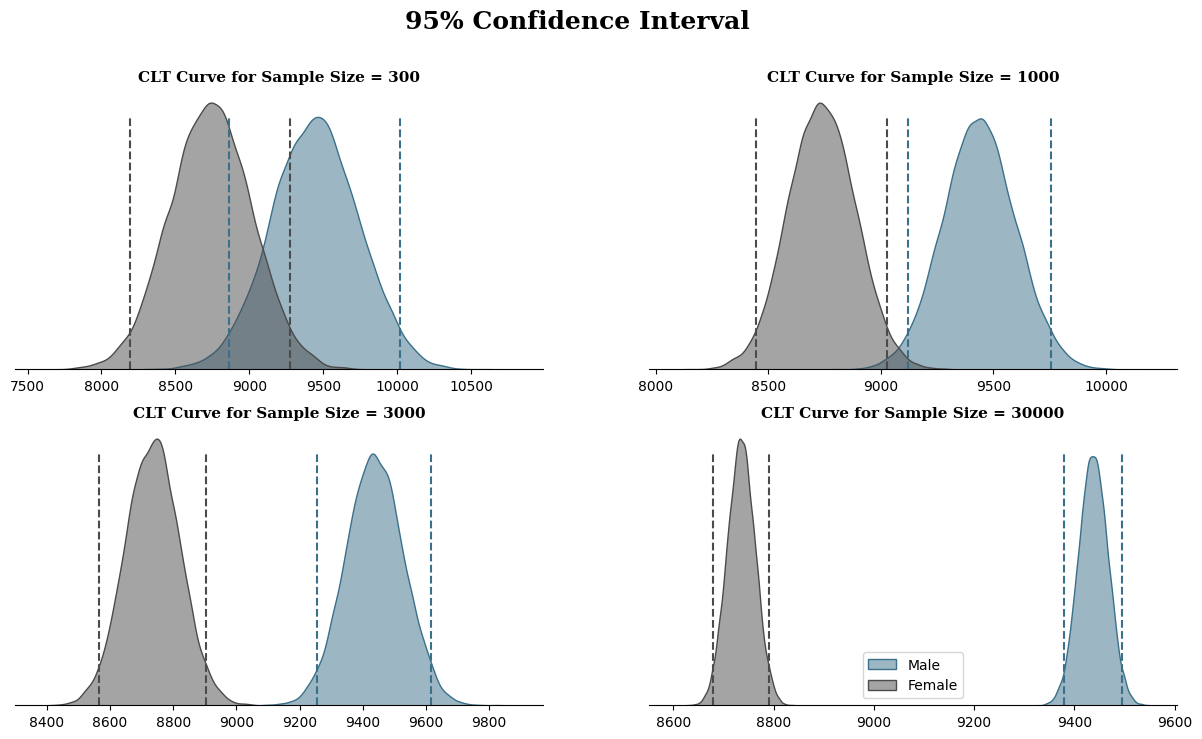

In [ ]:
m_samp_95,f_samp_95 = plot(95)

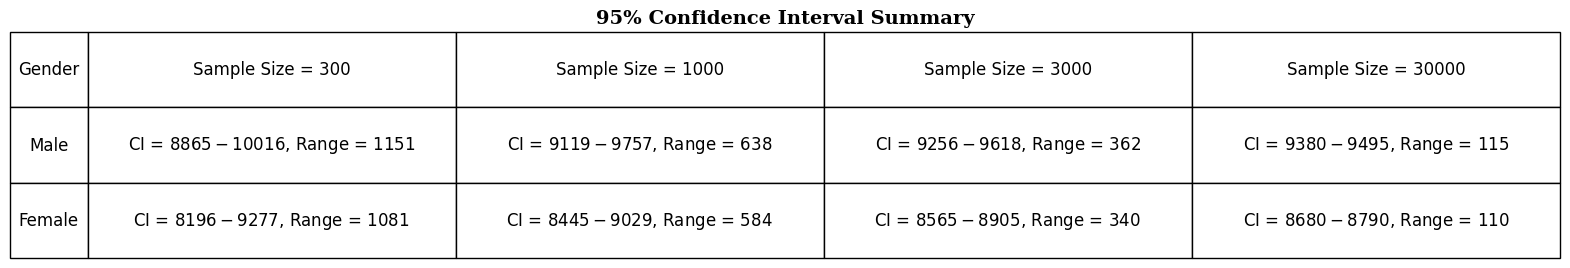

In [ ]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_95,f_samp_95,95,1)]:
 #list for collecting ci for given cl
 m_ci = ['Male']
 f_ci = ['Female']

 #finding ci for each sample size (males)
 for m in i:
  m_range = confidence_interval(i[m],k)
  m_ci.append(f"CI = ${m_range[0]:.0f}- ${m_range[1]:.0f}, Range = {(m_range[1]- m_range[0]):.0f}")

 #finding ci for each sample size (females)
 for f in j:
  f_range = confidence_interval(j[f],k)
  f_ci.append(f"CI = ${f_range[0]:.0f}- ${f_range[1]:.0f}, Range = {(f_range[1]- f_range[0]):.0f}")

 #plotting the summary
 ax = fig.add_subplot(gs[l])

 #contents of the table
 ci_info = [m_ci,f_ci]

 #plotting the table
 table = ax.table(cellText = ci_info, cellLoc='center',
 colLabels =['Gender','Sample Size = 300','Sample Size = 1000','Sample Size = 3000','Sample Size = 30000'],
 colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])
 table.set_fontsize(13)

 #removing axis
 ax.axis('off')

 #setting title
 ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

**Insights:**
1. Sample Size

 The analysis highlights the importance of sample size in estimating population parameters. It
 suggests that as the sample size increases, the confidence intervals become narrower and more
 precise. In business, this implies that larger sample sizes can provide more reliable insights and
 estimates.

2. Confidence Intervals

 From the above analysis, we can see that except for the Sample Size of 300, the confidence interval
 do not overlap as the sample size increases. This means that there is a statistically significant
 difference between the average spending per transaction for men and women within the given
 samples. Company can use this finding to better understand how men and women shop differently.
 They can then adjust their marketing and product offerings to make shopping more appealing to
 achieve group, potentially boosting sales and customer satisfaction.
3. Population Average

 It is concluding that at 95% confidence interval, the true population average for males falls between
  9,393 and  9,483 dollars, and for females, it falls between  8,692 and  8,777 dollars.
4. Women spend less

 Men tend to spend more money per transaction on average than women, as the upper bounds
 of the confidence intervals for men are consistently higher than those for women across different
 sample sizes.

**Are confidence intervals of average male and female spending overlapping?**

From the above analysis, we can see that except for the Sample Size of 300, the confidence interval
 do not overlap as the sample size increases. This means that there is a statistically significant
 difference between the average spending per transaction for men and women within the given
 samples. Company can use this finding to better understand how men and women shop differently.
 They can then adjust their marketing and product offerings to make shopping more appealing to
 achieve group, potentially boosting sales and customer satisfaction.

**Recommendations How can Walmart leverage this conclusion to make changes or
 improvements?**

 • Segmentation Opportunities

Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater
 to the distinct spending behaviors of male and female customers. This approach may help maximize
 revenue from each customer segment.

 • Pricing Strategies

 Based on the above data of average spending per transaction by gender, they might adjust pricing or
 discount strategies to incentivize higher spending among male customers while ensuring competitive
 pricing for female-oriented products.

**Are Married spending more money per transaction than Unmarried? Why or
 Why not?**

In [ ]:
#creating a walmart_data for purchase amount vs marital status
expenses = walmart_data.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
expenses['sum_in_billions'] = round(expenses['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
expenses['%sum'] = round(expenses['sum']/expenses['sum'].sum(),2)

#calculationg per purchase amount
expenses['per_purchase'] = round(expenses['sum']/expenses['count'],2)
expenses.reset_index(drop=True)

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,Married,2086885295,225337,2.09,0.41,9261.17
1,Unmarried,3008927447,324731,3.01,0.59,9265.91


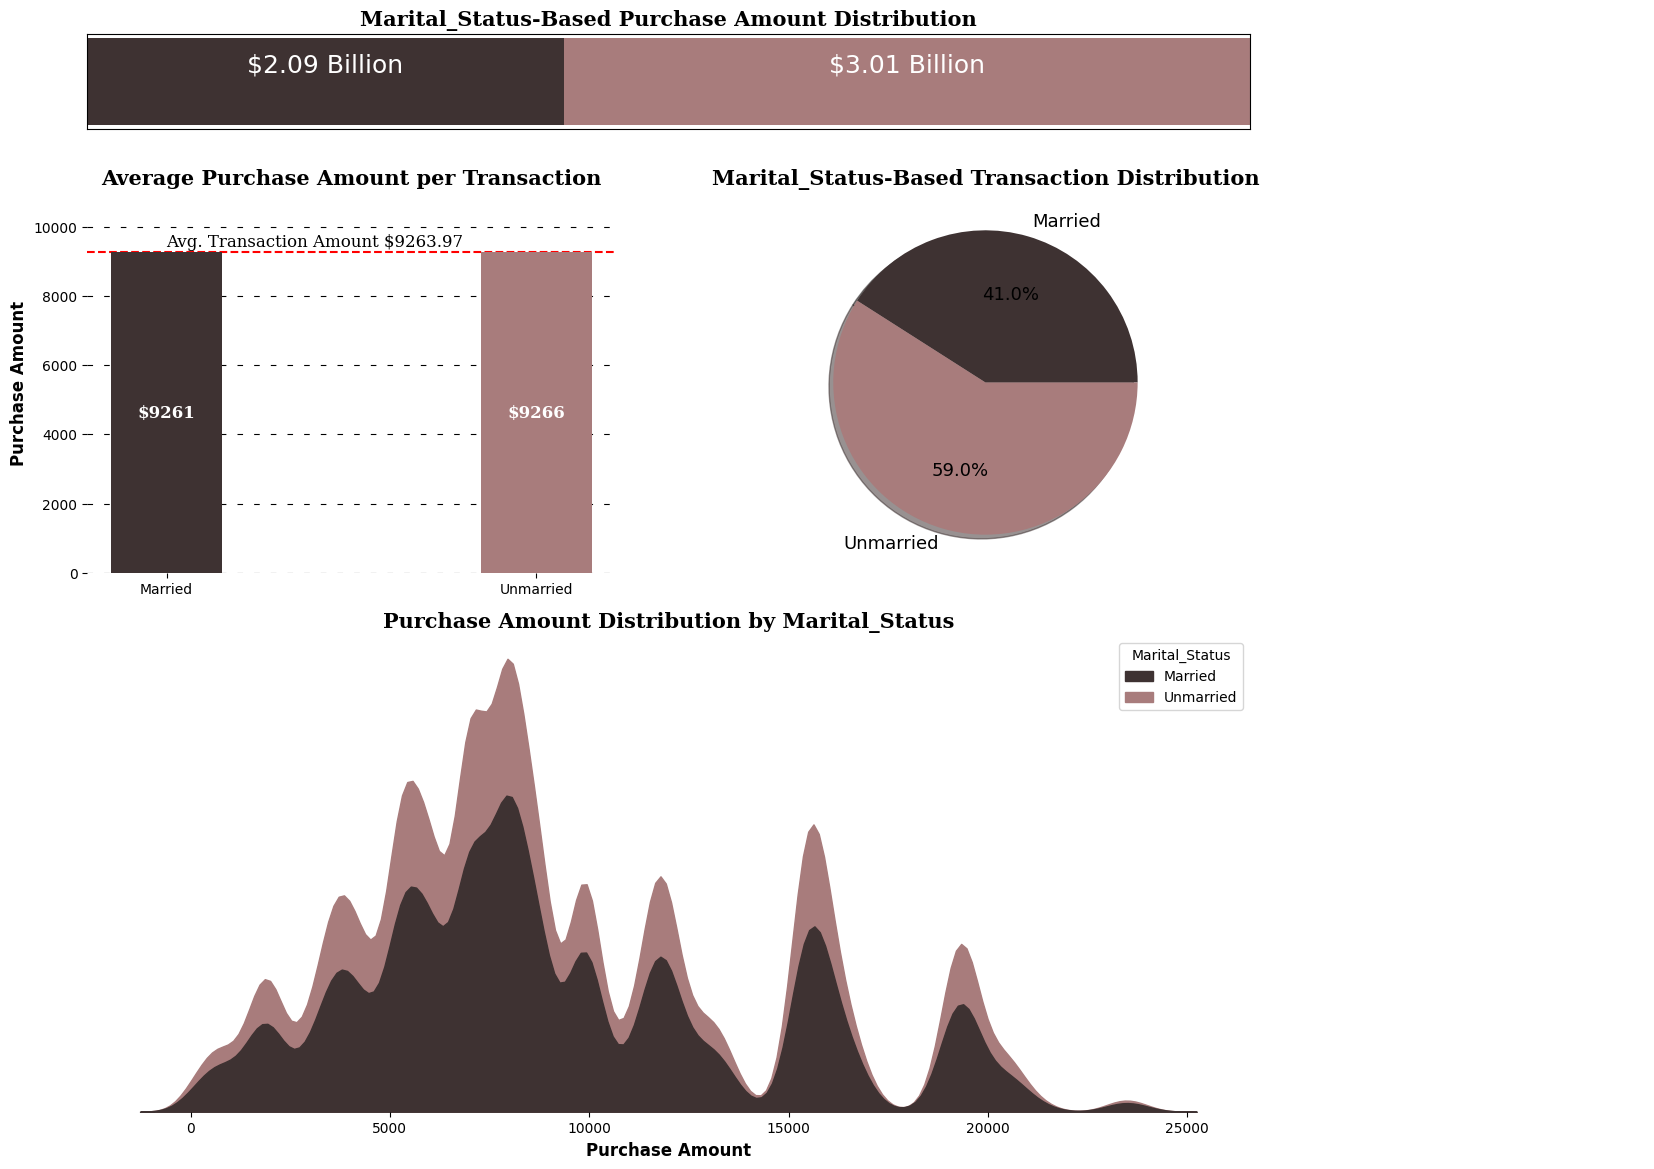

In [ ]:
# Setting the plot style
fig = plt.figure(figsize=(15, 14))
gs = fig.add_gridspec(3, 2, height_ratios=[0.10, 0.4, 0.5])

# Distribution of Purchase Amount
ax = fig.add_subplot(gs[0, :])
color_map = ["#3E3232", "#A87C7C"]

# Plotting the visual
ax.barh(expenses.loc[0, 'Marital_Status'], width=expenses.loc[0, '%sum'], color=color_map[0], label='Unmarried')
ax.barh(expenses.loc[0, 'Marital_Status'], width=expenses.loc[1, '%sum'], left=expenses.loc[0, '%sum'], color=color_map[1], label='Married')

# Inserting the text
txt = [0.0]  # For left parameter in ax.text()
for i in expenses.index:
    # For amount
    ax.text(expenses.loc[i, '%sum'] / 2 + txt[0], 0.15, f"${expenses.loc[i, 'sum_in_billions']} Billion",
            va='center', ha='center', fontsize=18, color='white')
    txt += expenses.loc[i, '%sum']

# Customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 1)

# Plot title for marital status
ax.text(expenses.loc[i, '%sum'] / 2 + txt[0], -0.20, f"{expenses.loc[i, 'Marital_Status']}",
        va='center', ha='center', fontsize=14, color='white')
ax.set_title('Marital_Status-Based Purchase Amount Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Distribution of Purchase Amount per Transaction
ax1 = fig.add_subplot(gs[1, 0])
color_map = ["#3E3232", "#A87C7C"]

# Plotting the visual
ax1.bar(expenses['Marital_Status'], expenses['per_purchase'], color=color_map, zorder=2, width=0.3)

# Adding average transaction line
avg = round(walmart_data['Purchase'].mean(), 2)
ax1.axhline(y=avg, color='red', zorder=0, linestyle='--')

# Adding text for the line
ax1.text(0.4, avg + 300, f"Avg. Transaction Amount ${avg}", {'font': 'serif', 'size': 12}, ha='center', va='center')

# Adjusting the y-limits
ax1.set_ylim(0, 11000)

# Adding the value_counts
for i in expenses.index:
    ax1.text(expenses.loc[i, 'Marital_Status'], expenses.loc[i, 'per_purchase'] / 2,
             f"${expenses.loc[i, 'per_purchase']:.0f}", {'font': 'serif', 'size': 12, 'color': 'white', 'weight': 'bold'},
             ha='center', va='center')

# Adding grid lines
ax1.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Adding axis label
ax1.set_ylabel('Purchase Amount', fontweight='bold', fontsize=12)

# Setting title for visual
ax1.set_title('Average Purchase Amount per Transaction', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Creating pie chart for Marital_Status distribution
ax2 = fig.add_subplot(gs[1, 1])
color_map = ["#3E3232", "#A87C7C"]
ax2.pie(expenses['count'], labels=expenses['Marital_Status'], autopct='%.1f%%', shadow=True,
         colors=color_map, textprops={'fontsize': 13, 'color': 'black'})

# Setting title for visual
ax2.set_title('Marital_Status-Based Transaction Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Creating kdeplot for purchase amount distribution
ax3 = fig.add_subplot(gs[2, :])
color_map = ["#3E3232", "#A87C7C"]

# Plotting the kdeplot
sns.kdeplot(data=walmart_data, x='Purchase', hue='Marital_Status',
             palette=color_map, fill=True, alpha=1,
             ax=ax3, hue_order=['Married', 'Unmarried'])

# Removing the axis lines
for axislines in ['top', 'left', 'right', 'bottom']:
    ax1.spines[axislines].set_visible(False)
    ax2.spines[axislines].set_visible(False)
    ax3.spines[axislines].set_visible(False)

# Adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount', fontweight='bold', fontsize=12)

# Setting title for visual
ax3.set_title('Purchase Amount Distribution by Marital_Status', {'font': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()

**Insights:**
 1. Total Sales and Transactions Comparison
 The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.
 2. Average Transaction Value
 The average purchase amount per transaction was almost similar for married and unmarried customers (9261 vs 9266) dollars.
 3. Distribution of Purchase Amount
 As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

**Confidence Interval Construction: Estimating Average Purchase Amount per
 Transaction by Marital Status**

1. Step 1- Building CLT Curve: As seen above, the purchase amount distribution is not Normal. So we need to use Cen
tral Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

2. Step 2- Building Confidence Interval: After building CLT curve, we will create a confidence interval predicting population mean at 95% Confidence level.

**Note**- We will use different sample sizes of [300,1000,3000,30000]

In [ ]:
 # Defining a function for plotting the visual for given confidence interval
def plot(ci):
    # Setting the plot style
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)

    # Creating separate data frames
    df_married = walmart_data.loc[walmart_data['Marital_Status'] == 'Married', 'Purchase']
    df_unmarried = walmart_data.loc[walmart_data['Marital_Status'] == 'Unmarried', 'Purchase']

    # Sample sizes and corresponding plot positions
    sample_sizes = [(300, 0, 0), (1000, 0, 1), (3000, 1, 0), (30000, 1, 1)]

    # Number of samples to be taken from purchase amount
    bootstrap_samples = 20000
    married_samples = {}
    unmarried_samples = {}

    for i, x, y in sample_sizes:
        married_means = []  # List for collecting the means of married sample
        unmarried_means = []  # List for collecting the means of unmarried sample

        for j in range(bootstrap_samples):
            # Creating random samples of size i
            married_bootstrapped_samples = np.random.choice(df_married, size=i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried, size=i)

            # Calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            # Appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        # Storing the above samples generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        # Creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data={'married_means': married_means, 'unmarried_means': unmarried_means})

        # Plot position
        ax = fig.add_subplot(gs[x, y])

        # Plotting kdeplots for married and unmarried
        sns.kdeplot(data=temp_df, x='married_means', color="#3A7089", fill=True, alpha=0.5, ax=ax, label='Married')
        sns.kdeplot(data=temp_df, x='unmarried_means', color="#4b4b4c", fill=True, alpha=0.5, ax=ax, label='Unmarried')

        # Calculating confidence intervals for given confidence level (ci)
        m_range = confidence_interval(married_means, ci)
        u_range = confidence_interval(unmarried_means, ci)

        # Plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x=k, ymax=0.9, color="#3A7089", linestyle='--')

        for k in u_range:
            ax.axvline(x=k, ymax=0.9, color="#4b4b4c", linestyle='--')

        # Removing the axis lines
        for axislines in ['top', 'left', 'right']:
            ax.spines[axislines].set_visible(False)

        # Adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}', {'font': 'serif', 'size': 11, 'weight': 'bold'})

    plt.legend()

    # Setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18, weight='bold')
    plt.show()

    return married_samples, unmarried_samples

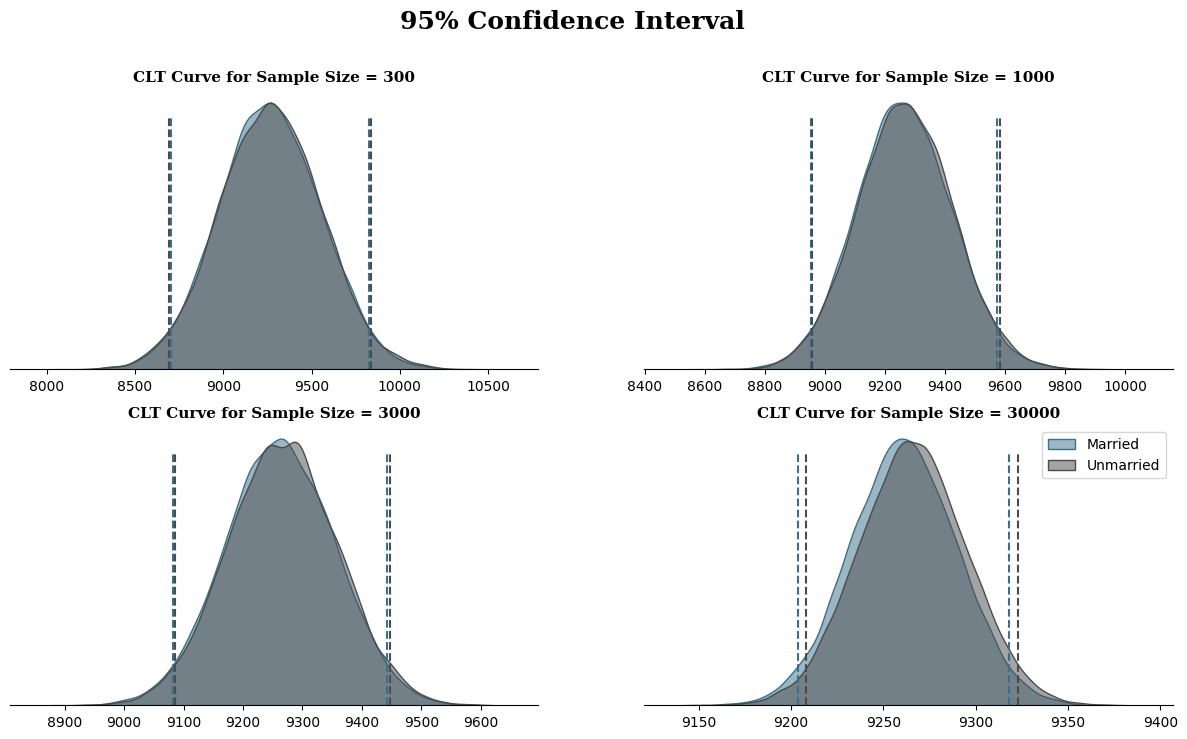

In [ ]:
m_samp_95,u_samp_95 = plot(95)

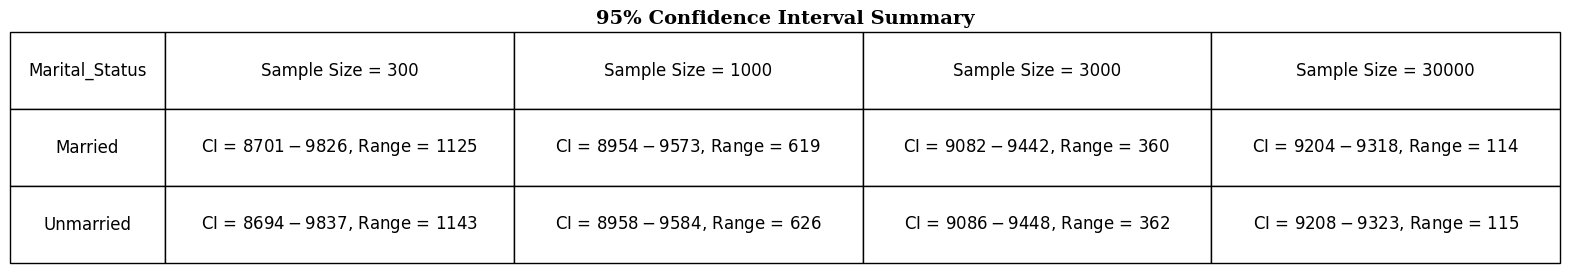

In [ ]:
# Setting the plot style
fig, ax = plt.subplots(figsize=(20, 3))

# List for collecting ci for given cl
m_ci = ['Married']
u_ci = ['Unmarried']

# Finding ci for each sample size (married)
for m in m_samp_95:
    m_range = confidence_interval(m_samp_95[m], 95)
    m_ci.append(f"CI = ${m_range[0]:.0f}- ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

# Finding ci for each sample size (unmarried)
for u in u_samp_95:
    u_range = confidence_interval(u_samp_95[u], 95)
    u_ci.append(f"CI = ${u_range[0]:.0f}- ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

# Plotting the summary
# Contents of the table
ci_info = [m_ci, u_ci]

# Plotting the table
table = ax.table(cellText=ci_info, cellLoc='center',
                 colLabels=['Marital_Status', 'Sample Size = 300', 'Sample Size = 1000', 'Sample Size = 3000', 'Sample Size = 30000'],
                 colLoc='center', colWidths=[0.1, 0.225, 0.225, 0.225, 0.225], bbox=[0, 0, 1, 1])
table.set_fontsize(13)

# Removing axis
ax.axis('off')

# Setting title
ax.set_title(f"95% Confidence Interval Summary", {'font': 'serif', 'size': 14, 'weight': 'bold'})

plt.show()

 **Insights:**
 1. Sample Size

 The analysis highlights the importance of sample size in estimating population parameters. It
 suggests that as the sample size increases, the confidence intervals become narrower and more
 precise. In business, this implies that larger sample sizes can provide more reliable insights and
 estimates.
 2. Confidence Intervals

 From the above analysis, we can see that the confidence interval overlap for all the sample sizes.
This means that there is no statistically significant difference between the average spending per
 transaction for married and unmarried customers within the given samples.
 3. Population Average

 We are 95% confident that the true population average for married customers falls between 9,217
 and 9,305 dollars, and for unmarried customers, it falls between 9,222 and 9,311 dollars.
 4. Both the customers spend equal

 The overlapping confidence intervals of average spending for married and unmarried customers
 indicate that both married and unmarried customers spend a similar amount per transaction. This
 implies a resemblance in spending behavior between the two groups. The confidence intervals
 of average spending for married and unmarried customers overlap, indicating that there is no
 statistically significant difference in spending between these two groups.

**Are confidence intervals of average married and unmarried customer spending
 overlapping?**

From the above analysis, we can see that the confidence interval overlap for all the sample sizes.
 This means that there is no statistically significant difference between the average spending per
 transaction for married and unmarried customers within the given samples.

 **Recommendations How can Walmart leverage this conclusion to make changes or
 improvements?**

*   Marketing Resources


Walmart may not need to allocate marketing resources specifically targeting one group over the
 other. Instead, they can focus on broader marketing strategies that appeal to both groups.

 To leverage this conclusion, The retail company can focus on providing a consistent shopping
 experience for both married and unmarried customers. They can continue to offer a diverse range
 of products and promotions that appeal to a broad customer base, ensuring that both groups feel
 valued and catered to.

In [ ]:
#creating a walmart_data for purchase amount vs age group
money_byAge = walmart_data.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
money_byAge['sum_in_billions'] = round(money_byAge['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
money_byAge['%sum'] = round(money_byAge['sum']/money_byAge['sum'].sum(),2)

#calculationg per purchase amount
money_byAge['per_purchase'] = round(money_byAge['sum']/money_byAge['count'],2)

money_byAge.reset_index(drop=True)

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.03,8933.46
1,18-25,913848675,99660,0.91,0.18,9169.66
2,26-35,2031770578,219587,2.03,0.40,9252.69
3,36-45,1026569884,110013,1.03,0.20,9331.35
4,46-50,420843403,45701,0.42,0.08,9208.63
5,51-55,367099644,38501,0.37,0.07,9534.81
6,55+,200767375,21504,0.20,0.04,9336.28


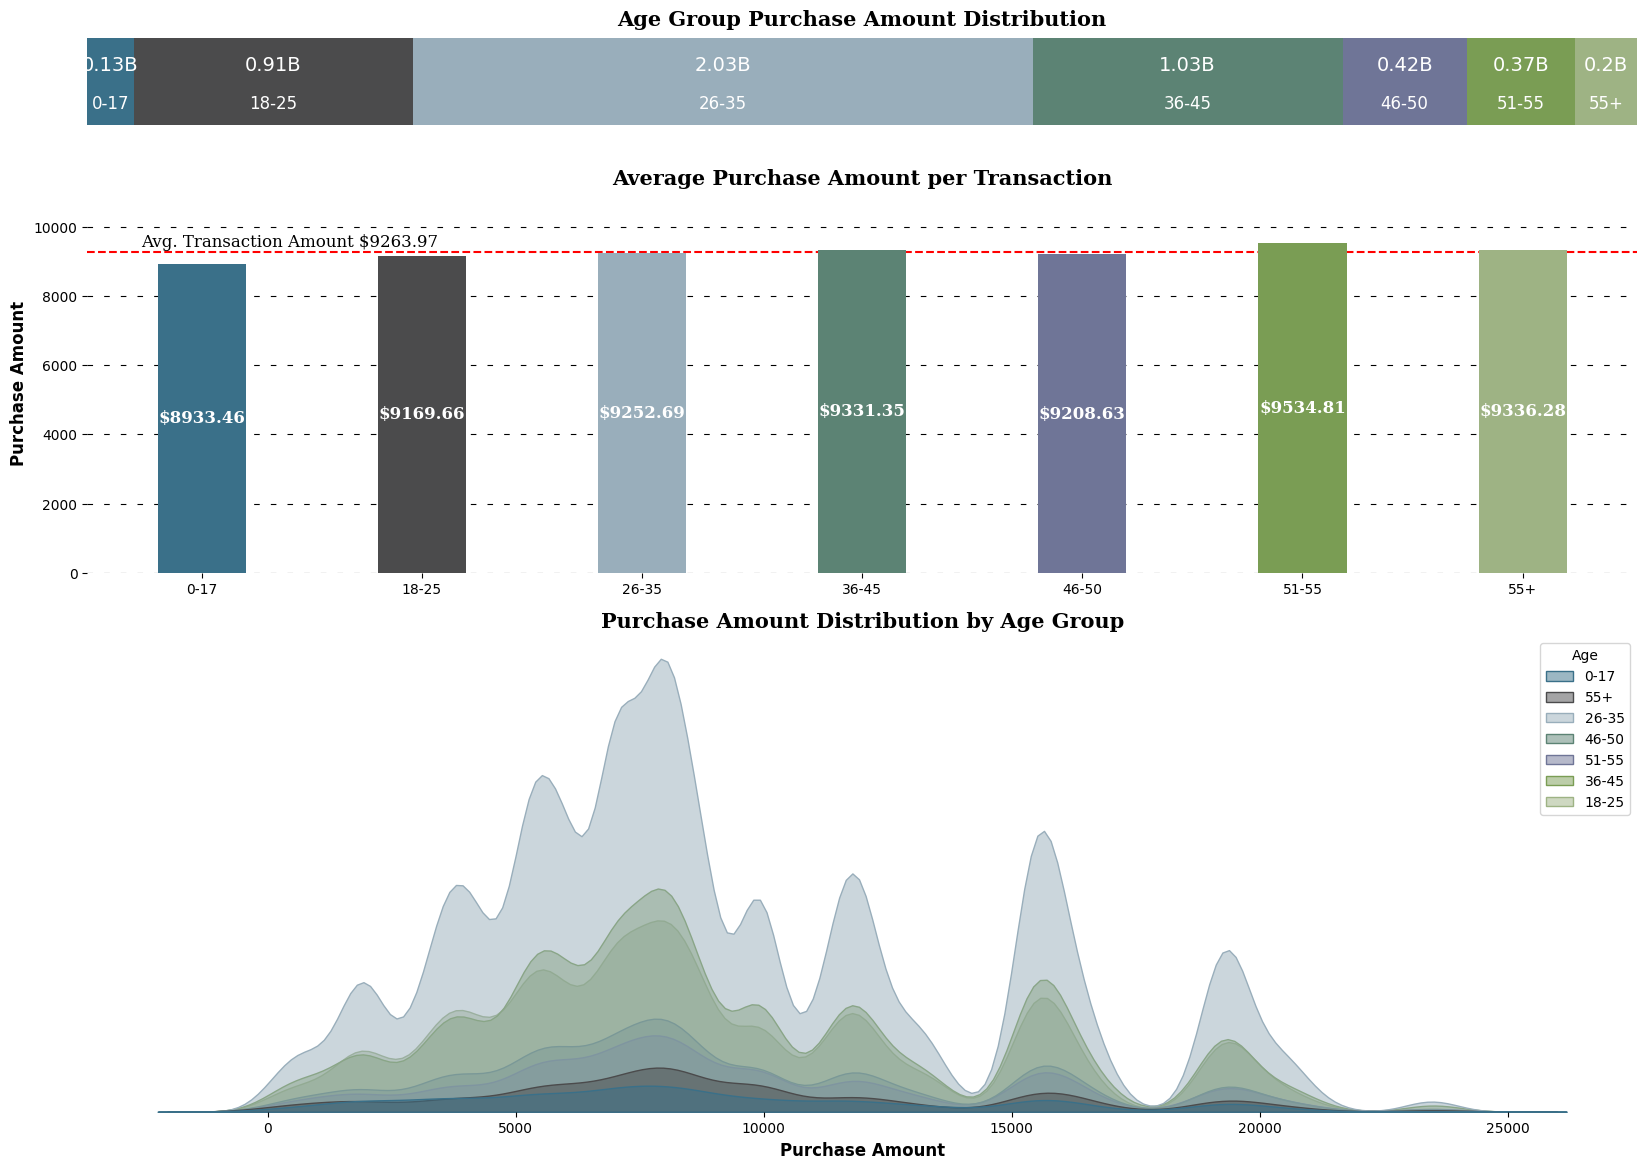

In [ ]:
# Setting the plot style
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 1, height_ratios=[0.10, 0.4, 0.5])

# Distribution of Purchase Amount
ax = fig.add_subplot(gs[0])
color_map = ["#3A7089", "#4b4b4c", '#99AEBB', '#5C8374', '#6F7597', '#7A9D54', '#9EB384']

# Plotting the visual
left = 0
for i in money_byAge.index:
    ax.barh(money_byAge.loc[0, 'Age'], width=money_byAge.loc[i, '%sum'], left=left, color=color_map[i], label=money_byAge.loc[i, 'Age'])
    left += money_byAge.loc[i, '%sum']

# Inserting the text
txt = 0.0  # For left parameter in ax.text()
for i in money_byAge.index:
    # For amount
    ax.text(money_byAge.loc[i, '%sum'] / 2 + txt, 0.15, f"{money_byAge.loc[i, 'sum_in_billions']}B",
            va='center', ha='center', fontsize=14, color='white')
    # For age group
    ax.text(money_byAge.loc[i, '%sum'] / 2 + txt, -0.20, f"{money_byAge.loc[i, 'Age']}",
            va='center', ha='center', fontsize=12, color='white')
    txt += money_byAge.loc[i, '%sum']

# Customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 1)

# Plot title
ax.set_title('Age Group Purchase Amount Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Distribution of Purchase Amount per Transaction
ax1 = fig.add_subplot(gs[1])

# Plotting the visual
ax1.bar(money_byAge['Age'], money_byAge['per_purchase'], color=color_map, zorder=2, width=0.4)

# Adding average transaction line
avg = round(walmart_data['Purchase'].mean(), 2)
ax1.axhline(y=avg, color='red', zorder=0, linestyle='--')

# Adding text for the line
ax1.text(0.4, avg + 300, f"Avg. Transaction Amount ${avg}", {'font': 'serif', 'size': 12}, ha='center', va='center')

# Adjusting the y-limits
ax1.set_ylim(0, 11000)

# Adding the value_counts
for i in money_byAge.index:
    ax1.text(money_byAge.loc[i, 'Age'], money_byAge.loc[i, 'per_purchase'] / 2,
             f"${money_byAge.loc[i, 'per_purchase']}", {'font': 'serif', 'size': 12,
             'color': 'white', 'weight': 'bold'}, ha='center', va='center')

# Adding grid lines
ax1.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Adding axis label
ax1.set_ylabel('Purchase Amount', fontweight='bold', fontsize=12)

# Setting title for visual
ax1.set_title('Average Purchase Amount per Transaction', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Creating kdeplot for purchase amount distribution
ax2 = fig.add_subplot(gs[2,:])

# Plotting the kdeplot
sns.kdeplot(data=walmart_data, x='Purchase', hue='Age', palette=color_map,
            fill=True, alpha=0.5, ax=ax2)

# Removing the axis lines
for axislines in ['top', 'left', 'right', 'bottom']:
    ax.spines[axislines].set_visible(False)
    ax1.spines[axislines].set_visible(False)
    ax2.spines[axislines].set_visible(False)

# Adjusting axis labels
ax2.set_yticks([])
ax2.set_ylabel('')
ax2.set_xlabel('Purchase Amount', fontweight='bold', fontsize=12)

# Setting title for visual
ax2.set_title('Purchase Amount Distribution by Age Group', {'font': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()

**Insights:**
 1. Total Sales Comparison

 Age group between 26- 45 accounts to almost 60% of the total sales suggesting that Wal
mart's Black Friday sales are most popular among these age groups.
 The age group 0-17 has the lowest sales percentage (2.6%), which is expected as they may
 not have as much purchasing power. Understanding their preferences and providing special
 offers could be beneficial, especially considering the potential for building customer loyalty as
 they age.
 2. Average Transaction Value

 While there is not a significant difference in per purchase spending among the age groups,
 the 51-55 age group has a relatively low sales percentage (7.2%)but they have the highest
 per purchase spending at 9535. Walmart could consider strategies to attract and retain this
 high-spending demographic.
 3. Distribution of Purchase Amount

 As seen above, the purchase amount for all age groups is not normally distributed.

**Confidence Interval Construction: Estimating Average Purchase Amount per
 Transaction**

1. Step 1- Building CLT Curve

  As seen above, the purchase amount distribution is not Normal. So we need to use Central Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution
2. Step 2- Building Confidence Interval

 After building CLT curve, we will create a confidence interval predicting population mean at
 95% Confidence level.

 **Note**- We will use different sample sizes of **[300,1000,3000,30000]**

In [ ]:
# Defining a function for plotting the visual for given confidence interval
def plot(ci):
    # Setting the plot style
    fig = plt.figure(figsize=(15, 15))
    gs = fig.add_gridspec(4, 1)

    # Creating separate data frames
    df_1 = walmart_data.loc[walmart_data['Age'] == '0-17', 'Purchase']
    df_2 = walmart_data.loc[walmart_data['Age'] == '18-25', 'Purchase']
    df_3 = walmart_data.loc[walmart_data['Age'] == '26-35', 'Purchase']
    df_4 = walmart_data.loc[walmart_data['Age'] == '36-45', 'Purchase']
    df_5 = walmart_data.loc[walmart_data['Age'] == '46-50', 'Purchase']
    df_6 = walmart_data.loc[walmart_data['Age'] == '51-55', 'Purchase']
    df_7 = walmart_data.loc[walmart_data['Age'] == '55+', 'Purchase']

    # Sample sizes and corresponding plot positions
    sample_sizes = [(300, 0), (1000, 1), (5000, 2), (50000, 3)]

    # Number of samples to be taken from purchase amount
    bootstrap_samples = 20000
    samples1, samples2, samples3, samples4, samples5, samples6, samples7 = {}, {}, {}, {}, {}, {}, {}

    for i, x in sample_sizes:
        l1, l2, l3, l4, l5, l6, l7 = [], [], [], [], [], [], []

        for j in range(bootstrap_samples):
            # Creating random samples of size i
            bootstrapped_samples_1 = np.random.choice(df_1, size=i)
            bootstrapped_samples_2 = np.random.choice(df_2, size=i)
            bootstrapped_samples_3 = np.random.choice(df_3, size=i)
            bootstrapped_samples_4 = np.random.choice(df_4, size=i)
            bootstrapped_samples_5 = np.random.choice(df_5, size=i)
            bootstrapped_samples_6 = np.random.choice(df_6, size=i)
            bootstrapped_samples_7 = np.random.choice(df_7, size=i)

            # Calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)

            # Appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        # Storing the above samples generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7

        # Creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data={'0-17': l1, '18-25': l2, '26-35': l3,
                                      '36-45': l4, '46-50': l5, '51-55': l6,
                                      '55+': l7})

        # Plotting kdeplots
        # Plot position
        ax = fig.add_subplot(gs[x])

        # Plots
        for p, q in [('#3A7089', '0-17'), ('#4b4b4c', '18-25'), ('#99AEBB', '26-35'),
                     ('#5C8374', '36-45'), ('#6F7597', '46-50'), ('#7A9D54', '51-55'),
                     ('#9EB384', '55+')]:
            sns.kdeplot(data=temp_df, x=q, color=p, fill=True, alpha=0.5,
                        ax=ax, label=q)

        # Removing the axis lines
        for axislines in ['top', 'left', 'right']:
            ax.spines[axislines].set_visible(False)

        # Adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}', {'font': 'serif',
                                                           'size': 11,
                                                           'weight': 'bold'})

        plt.legend()

    # Setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18,
                  weight='bold')

    plt.show()

    return samples1, samples2, samples3, samples4, samples5, samples6, samples7

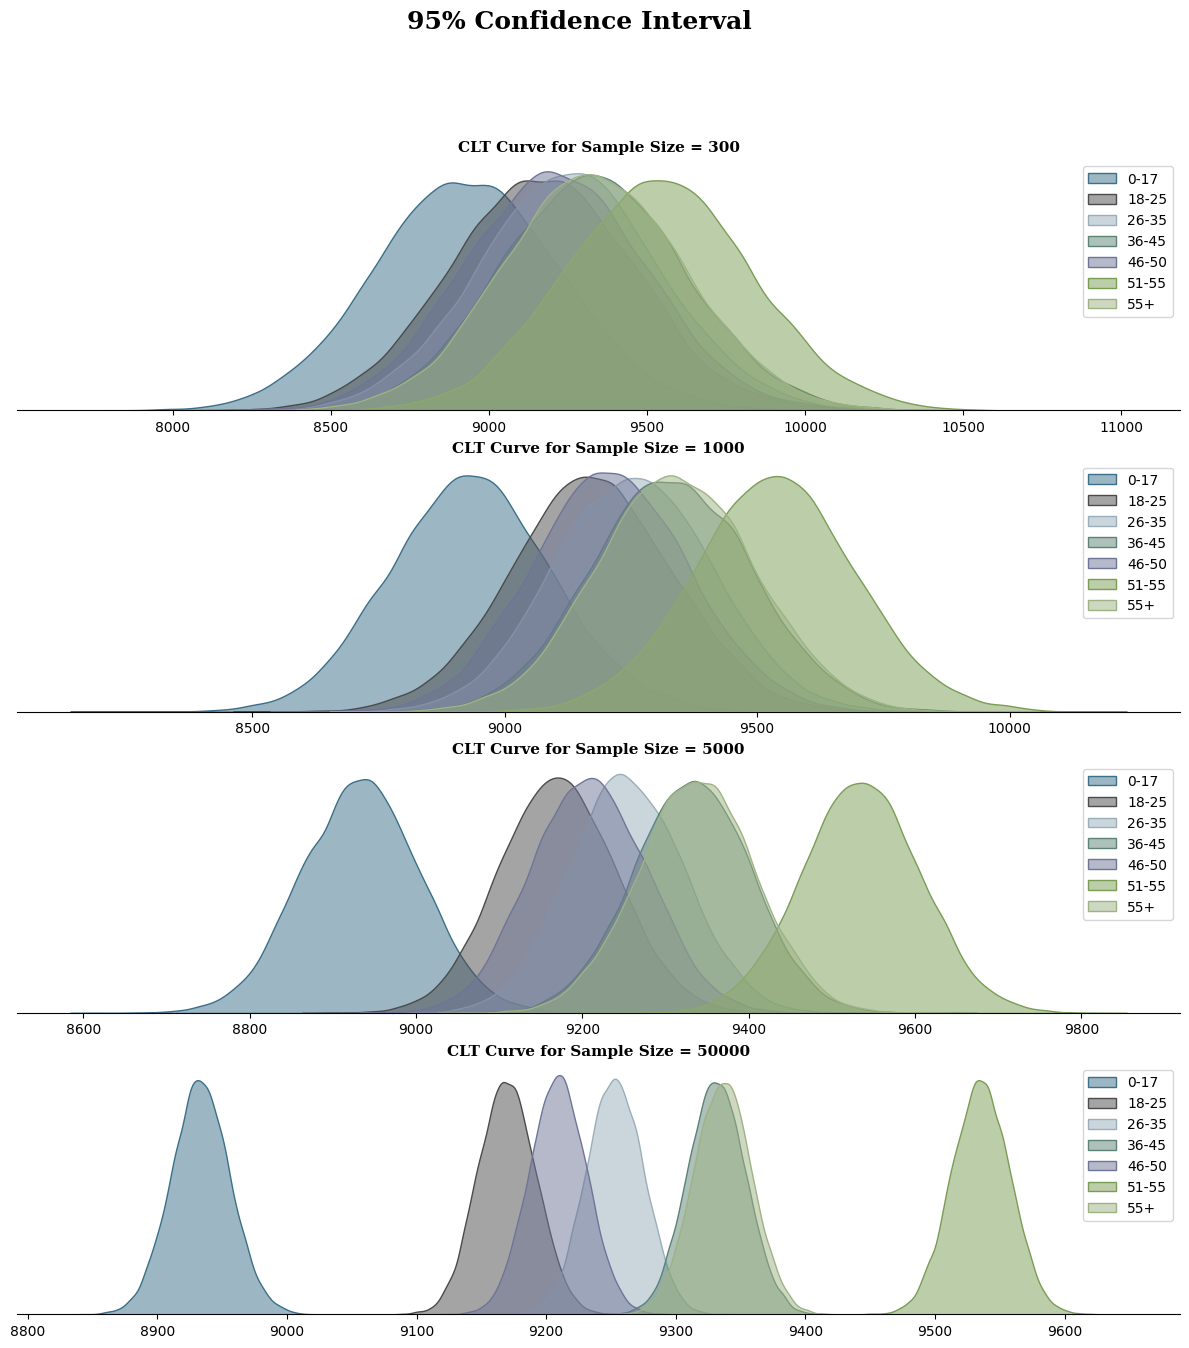

In [ ]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

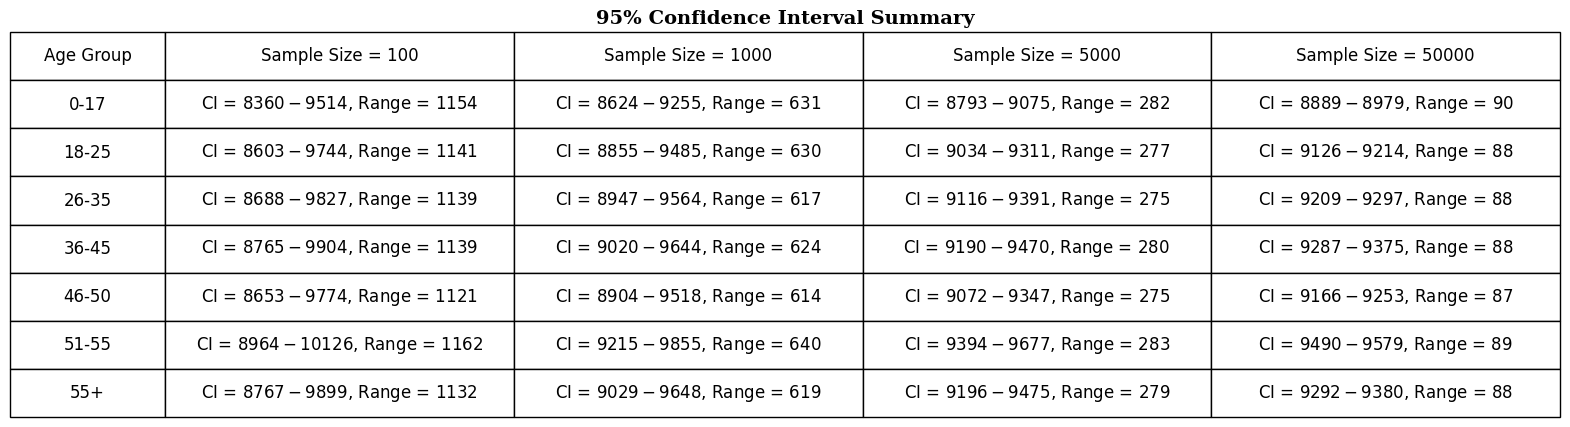

In [ ]:
# Setting the plot style
fig, ax = plt.subplots(figsize=(20, 5))

# List for collecting ci for given cl
ci_1, ci_2, ci_3, ci_4, ci_5, ci_6, ci_7 = ['0-17'], ['18-25'], ['26-35'], ['36-45'], ['46-50'], ['51-55'], ['55+']

# Finding ci for each sample size
samples = [
    (samples1, ci_1),
    (samples2, ci_2),
    (samples3, ci_3),
    (samples4, ci_4),
    (samples5, ci_5),
    (samples6, ci_6),
    (samples7, ci_7)
]

for s, c in samples:
    for i in s:
        s_range = confidence_interval(s[i], 95)
        c.append(f"CI = ${s_range[0]:.0f}- ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")

# Plotting the summary
# Contents of the table
ci_info = [ci_1, ci_2, ci_3, ci_4, ci_5, ci_6, ci_7]

# Plotting the table
table = ax.table(cellText=ci_info, cellLoc='center',
                 colLabels=['Age Group', 'Sample Size = 100', 'Sample Size = 1000', 'Sample Size = 5000', 'Sample Size = 50000'],
                 colLoc='center', colWidths=[0.1, 0.225, 0.225, 0.225, 0.225], bbox=[0, 0, 1, 1])
table.set_fontsize(13)

# Removing axis
ax.axis('off')

# Setting title
ax.set_title(f"95% Confidence Interval Summary", {'font': 'serif', 'size': 14, 'weight': 'bold'})

plt.show()

**Insights:**
 1. Sample Size

 The analysis highlights the importance of sample size in estimating population parameters. It
 suggests that as the sample size increases, the confidence intervals become narrower and more
 precise. In business, this implies that larger sample sizes can provide more reliable insights
 and estimates.
 2. Confidence Intervals and customer spending patterns

 From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups.

 • 0- 17 : Customers in this age group have the lowest spending per transaction

 • 18- 25, 26- 35, 46- 50 : Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics

 • 36- 45, 55+ : Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns

 • 51- 55 : Customers in this age group have the highest spending per transaction
 3. Population Average

 We are 95% confident that the true population average for following age groups falls between the below range

 • 0- 17 = 8,888 to 8,979 dollars

 • 18- 25 = 9,125 to 9,213 dollars

 • 26- 35 = 9,209 to 9,297 dollars

 • 36- 45 = 9,288 to 9,376 dollars

 • 46- 50 = 9,165 to 9,253 dollars

 • 51- 55 = 9,490 to 9,579 dollars

 • 55+ = 9,292 to 9,381 dollars

**Are confidence intervals of customer's age-group spending overlapping?**

From the above analysis, we can see that the confidence interval overlap for some of the age groups.
 We can club the average spending into following age groups

 • 0- 17 : Customers in this age group have the lowest spending per transaction

 • 18-25, 26- 35, 46- 50 : Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics

 • 36-45, 55+ : Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns

 • 51- 55 : Customers in this age group have the highest spending per transaction

 **How can Walmart leverage this conclusion to make changes or improvements?**
 1. Targeted Marketing

 Knowing that customers in the 0- 17 age group have the lowest spending per transaction, Walmart
 can try to increase their spending per transaction by offering them more attractive discounts,
 coupons, or rewards programs. Walmart can also tailor their product selection and marketing
 strategies to appeal to the preferences and needs of this age group
 2. Customer Segmentation

 Since customers in the 18- 25, 26- 35, and 46- 50 age groups exhibit similar buying characteristics,
 and so do the customers in 36- 45 and 55+, Walmart can optimize its product selection to cater to
 the preferences of these age groups. Also, Walmart can use this information to adjust their pricing
 strategies for different age groups.
 3. Premium Services

 Recognizing that customers in the 51- 55 age group have the highest spending per transaction,
 Walmart can explore opportunities to enhance the shopping experience for this demographic. This
 might involve offering premium services, personalized recommendations, or loyalty programs that
 cater to the preferences and spending habits of this age group.

**Recommendations:**
 1. Target Male Shoppers
 Since male customers account for a significant portion of Black Friday sales and tend to spend
 more per transaction on average, Walmart should tailor its marketing strategies and product
 offerings to incentivize higher spending among male customers while ensuring competitive
 pricing for female-oriented products.

 2. Focus on 26- 45 Age Group
 With the age group between 26 and 45 contributing to the majority of sales, Walmart should
 specifically cater to the preferences and needs of this demographic.This could include offering
 exclusive deals on products that are popular among this age group.
 3. Engage Younger Shoppers
 Knowing that customers in the 0- 17 age group have the lowest spending per transaction,
 Walmart can try to increase their spending per transaction by offering them more attractive
 discounts, coupons, or rewards programs. It's essential to start building brand loyalty among
 younger consumers.
 4. Customer Segmentation
 Since customers in the 18- 25, 26- 35, and 46- 50 age groups exhibit similar buying character
istics, and so do the customers in 36- 45 and 55+, Walmart can optimize its product selection
 to cater to the preferences of these age groups. Also, Walmart can use this information to
 adjust their pricing strategies for different age groups.
 5. Enhance the 51- 55 Age Group Shopping Experience
 Considering that customers aged 51- 55 have the highest spending per transaction, Walmart
 offer them exclusive pre-sale access, special discount or provide personalized product rec
ommendations for this age group. Walmart can also introduce loyalty programs specifically
 designed to reward and retain customers in the 51- 55 age group.

 6. Post-Black Friday Engagement
 After Black Friday, walmart should engage with customers who made purchases by sending
 follow-up emails or offers for related products. This can help increase customer retention and
 encourage repeat business throughout the holiday season and beyond.
 7. Targeted Marketing
 Company can create advertisements and promotions that specifically appeal to men and
 women. By understanding what each group likes, it can make its advertising more effective.
 8. Product Choices
 Company can look at which types of products are popular with men and women and make
 sure those products are easy to find and buy in the store.
 9. Different Groups
 Company can also look at other factors, like how old customers are, where they live, and if
 they're married or not. This can help to figure out how to make shopping better for different
 types of customers.
 10. Consistent Shopping
 While Company is making shopping better for different groups, it's important to make sure
 that everyone has a good shopping experience, no matter who they are.
 11. Keep Learning
 Company should always pay attention to what customers are doing and keep trying to make
 things better. This way, they can keep up with what customers like and make shopping even
 better.